** Project: TalentSift - Resume Screener App **

** Companies often receive thousands of resumes for each job posting and employ dedicated screening officers to screen qualified candidates.

Hiring the right talent is a challenge for all businesses. This challenge is magnified by the high volume of applicants if the business is labour-intensive, growing, and facing high attrition rates.

IT departments are short of growing markets. In a typical service organization, professionals with a variety of technical skills and business domain expertise are hired and assigned to projects to resolve customer issues. This task of selecting the best talent among many others is known as Resume Screening.

Typically, large companies do not have enough time to open each CV, so they use machine learning algorithms for the Resume Screening task. **

** Objective --> The app leverages the capabilities of Artificial Intelligence and Natural Language Processing to automate the resume screening and applicant evaluation process. By utilizing machine learning techniques, the app efficiently matches job requirements with applicant skills, streamlining the hiring process for recruiters and HR professionals. The dataset (UpdatedResumeDataSet.csv) contains resumes along with their respective categories. The project involves cleaning the resume text, visualizing the data distribution, and applying machine learning algorithms for classification. The goal of this project is to develop a system that can automatically categorize and screen resumes based on their content. This can be particularly useful for HR professionals or recruitment teams to efficiently handle a large volume of resumes. **

Step-01: Import all necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('UpdatedResumeDataSet.csv', encoding='utf-8', on_bad_lines='skip')  # supervised ML problem -> one i/p feture {resume} and one output feature {category}
df.head(n=4)

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...


In [6]:
# its a multi - class classification problem -> 15-20 levels {data science, advocate and so,on} not binary classification in 0/1 form

In [7]:
df.tail(n=4)

,Category,Resume
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...
961,Testing,Skill Set OS Windows XP/7/8/8.1/10 Database MY...


In [8]:
df.shape

(962, 2)

In [9]:
df.columns

Index(['Category', 'Resume'], dtype='object')

In [10]:
# check the data type of each column -->
df.dtypes

,0
Category,object
Resume,object


 Step-02: Data Exploration

In [11]:
print ("Displaying the distinct categories of resume -")
print (df['Category'].unique())

Displaying the distinct categories of resume -
['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']


In [12]:
print ("Displaying the distinct categories of resume and the number of records belonging to each category -")
print (df['Category'].value_counts())

Displaying the distinct categories of resume and the number of records belonging to each category -
Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64


In [13]:
counts = df['Category'].value_counts()
labels = df['Category'].nunique()
labels

25

Step-03: Data Pre-processing and EDA

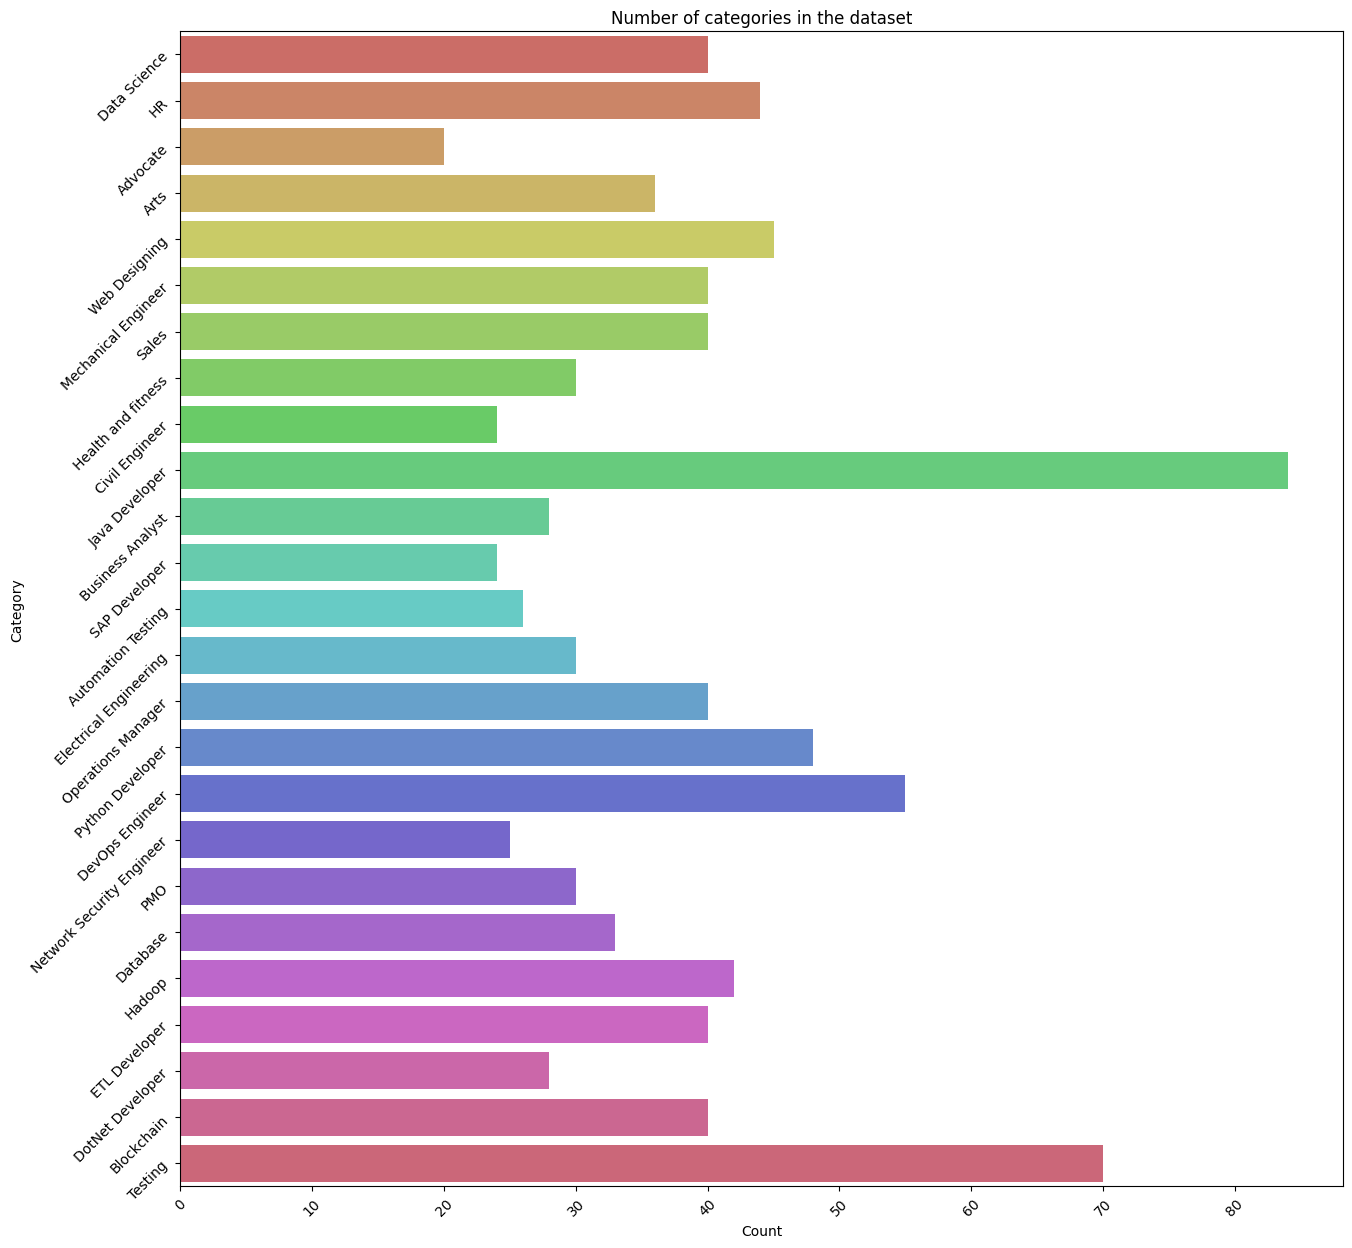

In [14]:
# Visualize the number of categories in the dataset ---->
plt.figure(figsize=(15,15))
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title("Number of categories in the dataset")
plt.ylabel("Category")
plt.xlabel("Count")
sns.countplot(y="Category", data=df, palette="hls")
plt.show()

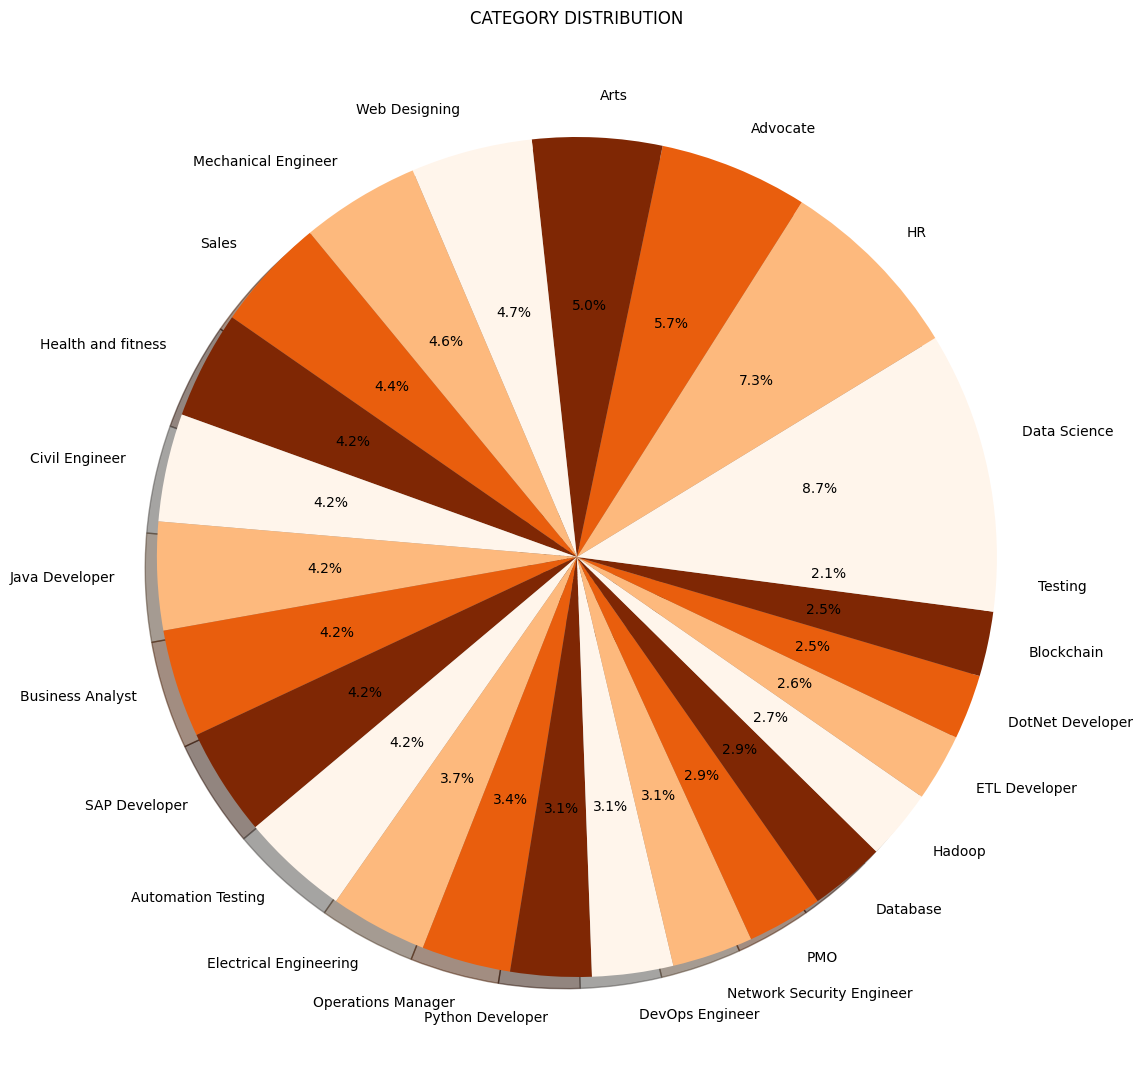

In [15]:
# Visualize the distribution of categories --->
from matplotlib.gridspec import GridSpec
targetCounts = df['Category'].value_counts()
targetLabels  = df['Category'].unique()
# Make square figures and axes
plt.figure(1, figsize=(30,30))
the_grid = GridSpec(2, 2)


cmap = plt.get_cmap('Oranges')
colors = [cmap(i) for i in np.linspace(0, 1, 4)]
plt.subplot(the_grid[0, 1], aspect=1, title='CATEGORY DISTRIBUTION')

source_pie = plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()

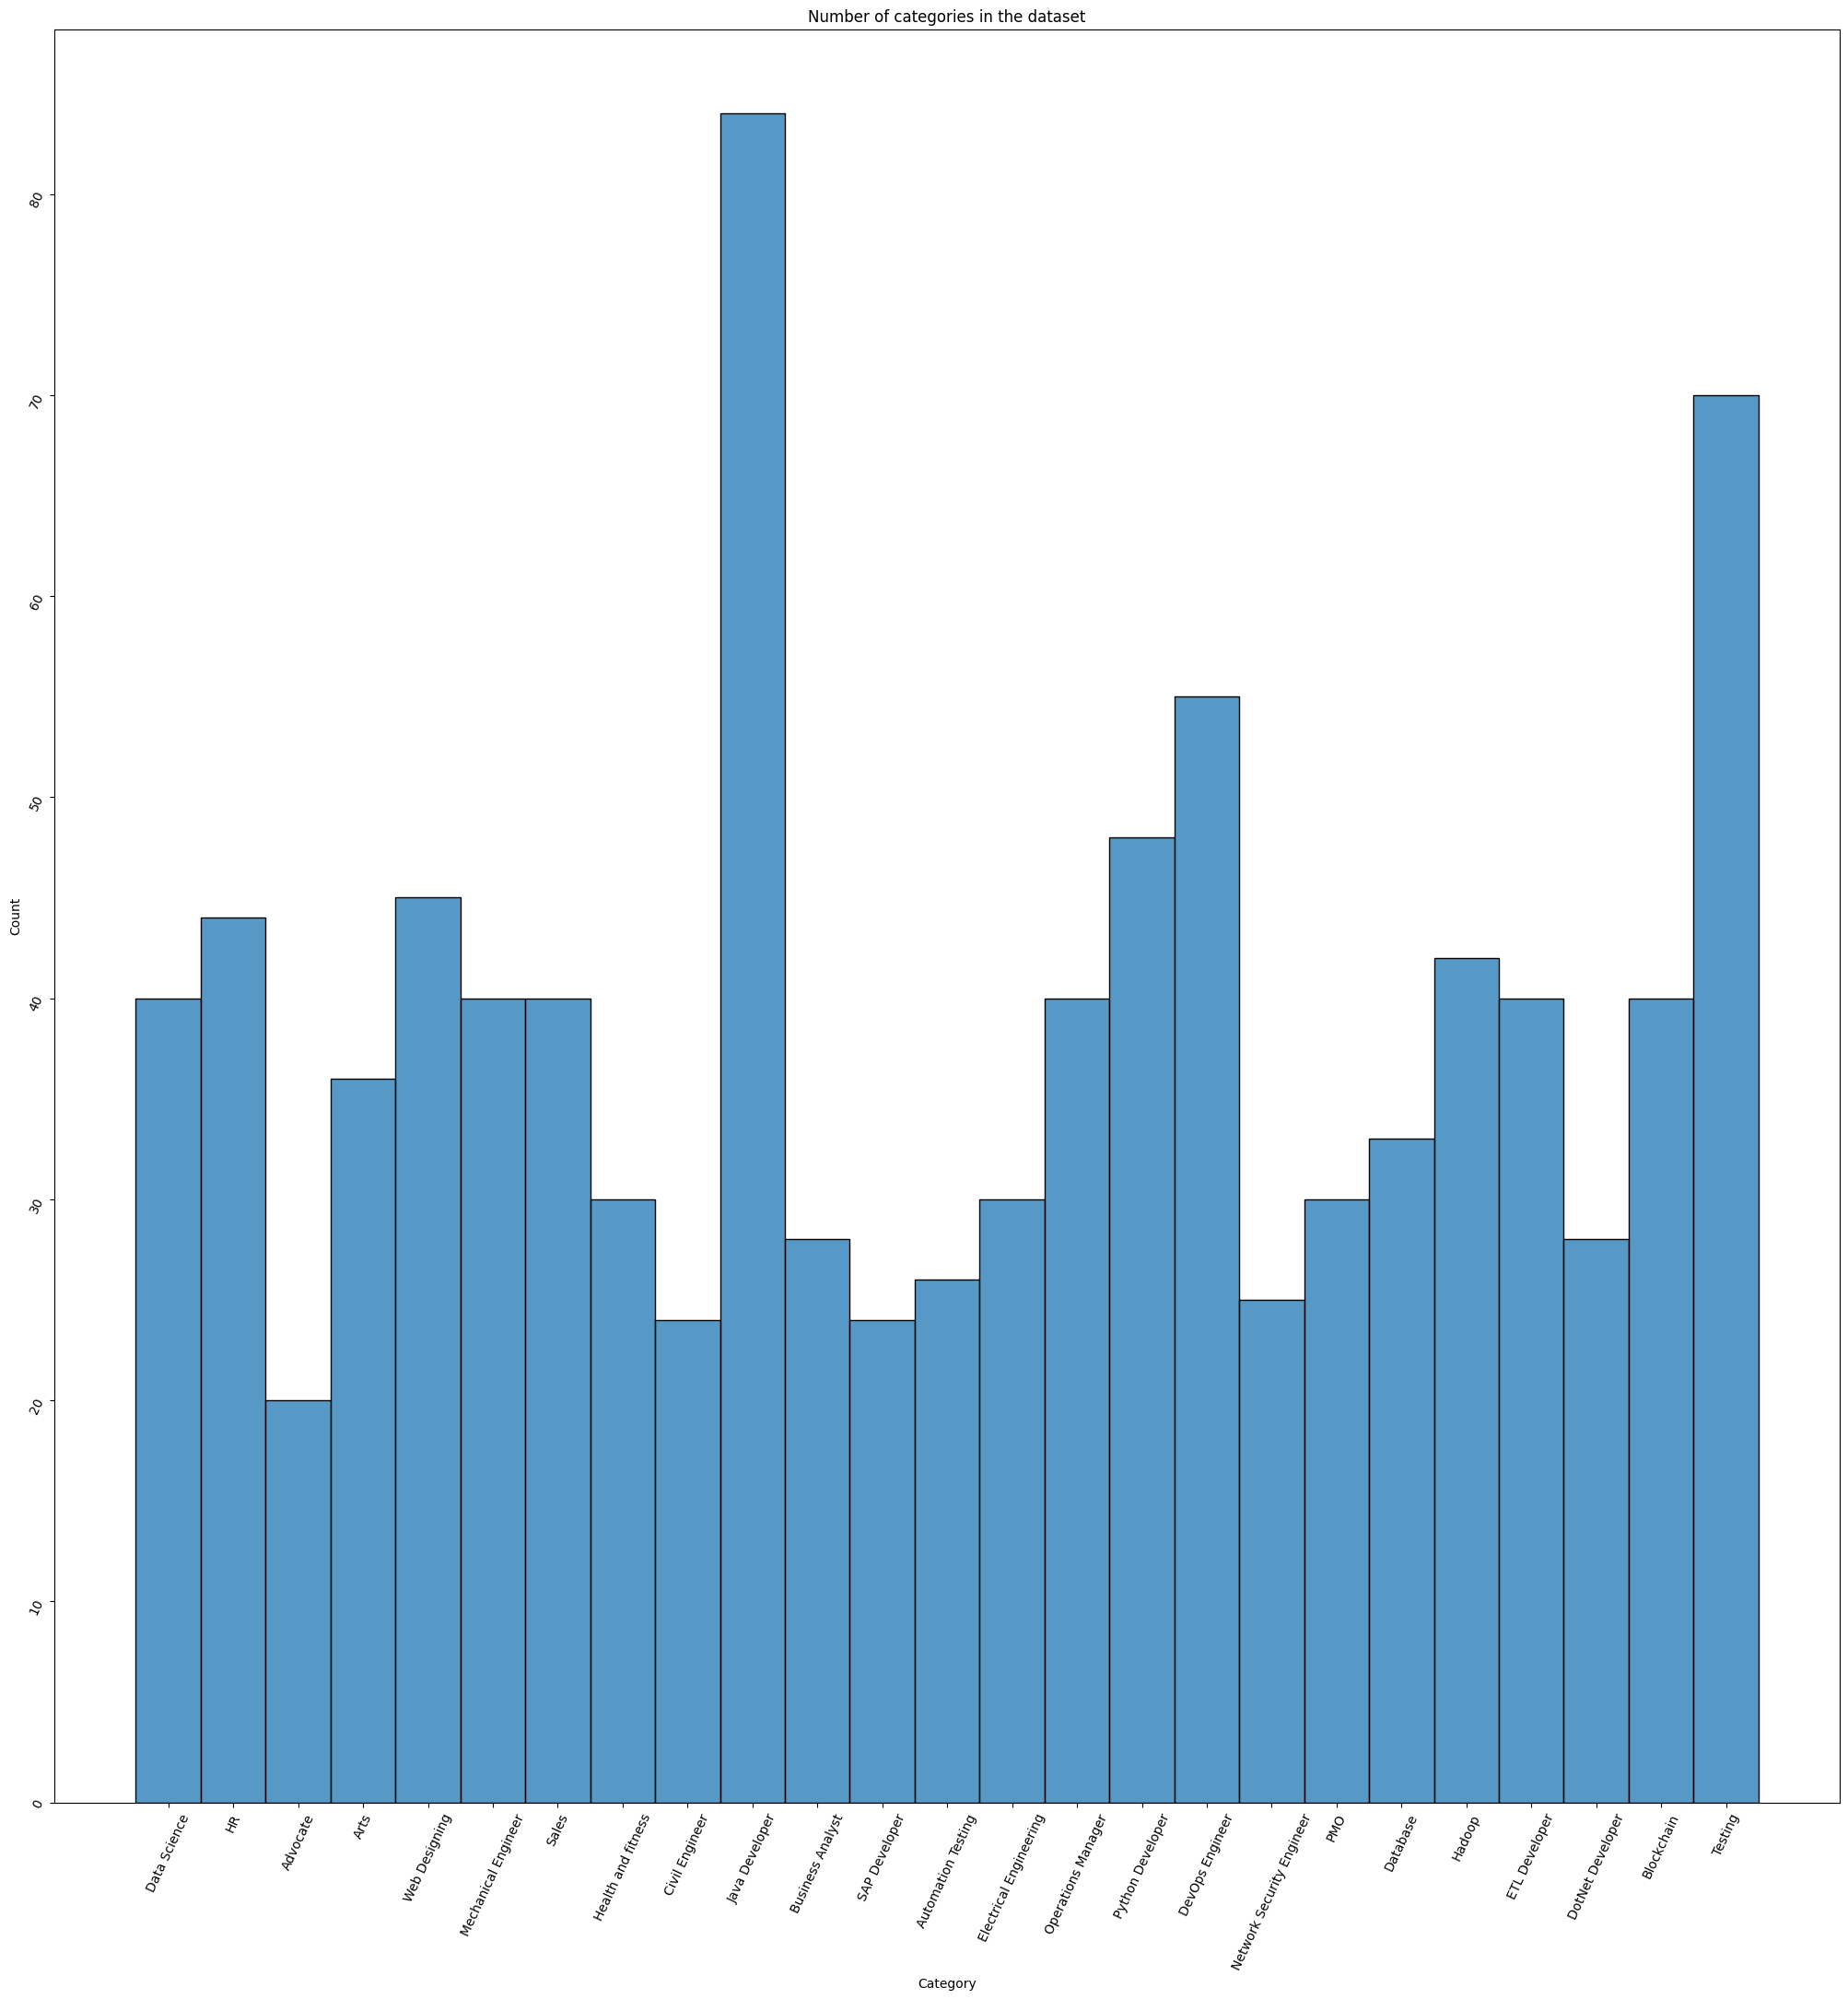

In [16]:
# Visualize the distribution of categories ---> using histogram plot
plt.figure(figsize=(25,25))
plt.xticks(rotation=65)
plt.yticks(rotation=65)
plt.title("Number of categories in the dataset")
plt.xlabel("Category")
plt.ylabel("Count")
sns.histplot(x="Category", data=df, palette="hls")
plt.show()

In [17]:
# check for null values --->
df.isnull().sum()                # no null values in this dataset

,0
Category,0
Resume,0


In [18]:
df.isnull().value_counts()

,,count
Category,Resume,
False,False,962


In [19]:
df.isna().sum()             # no null values in this dataset

,0
Category,0
Resume,0


In [20]:
df.describe()

,Category,Resume
count,962,962
unique,25,166
top,Java Developer,"Technical Skills Web Technologies: Angular JS,..."
freq,84,18


In [21]:
# to analyze the length of resumes within each category, you can use: mean
df.groupby('Category')['Resume'].apply(lambda x: x.str.len().mean())

,Resume
Category,
Advocate,953.700000
Arts,2293.500000
Automation Testing,4163.769231
Blockchain,2290.200000
Business Analyst,4944.428571
Civil Engineer,3069.166667
Data Science,3213.100000
Database,3873.909091
DevOps Engineer,3996.745455


In [22]:
# to analyze the length of resumes within each category, you can use: median
df.groupby('Category')['Resume'].apply(lambda x: x.str.len().median())

,Resume
Category,
Advocate,709.5
Arts,1070.5
Automation Testing,4329.0
Blockchain,2408.0
Business Analyst,2344.5
Civil Engineer,3247.0
Data Science,1824.5
Database,3695.0
DevOps Engineer,4820.0


In [23]:
# to analyze the length of resumes within each category, you can use: std
df.groupby('Category')['Resume'].apply(lambda x: x.str.len().std())

,Resume
Category,
Advocate,783.029078
Arts,2872.842102
Automation Testing,2073.521957
Blockchain,783.413281
Business Analyst,4032.345439
Civil Engineer,2231.712652
Data Science,2616.771291
Database,990.485057
DevOps Engineer,1719.756811


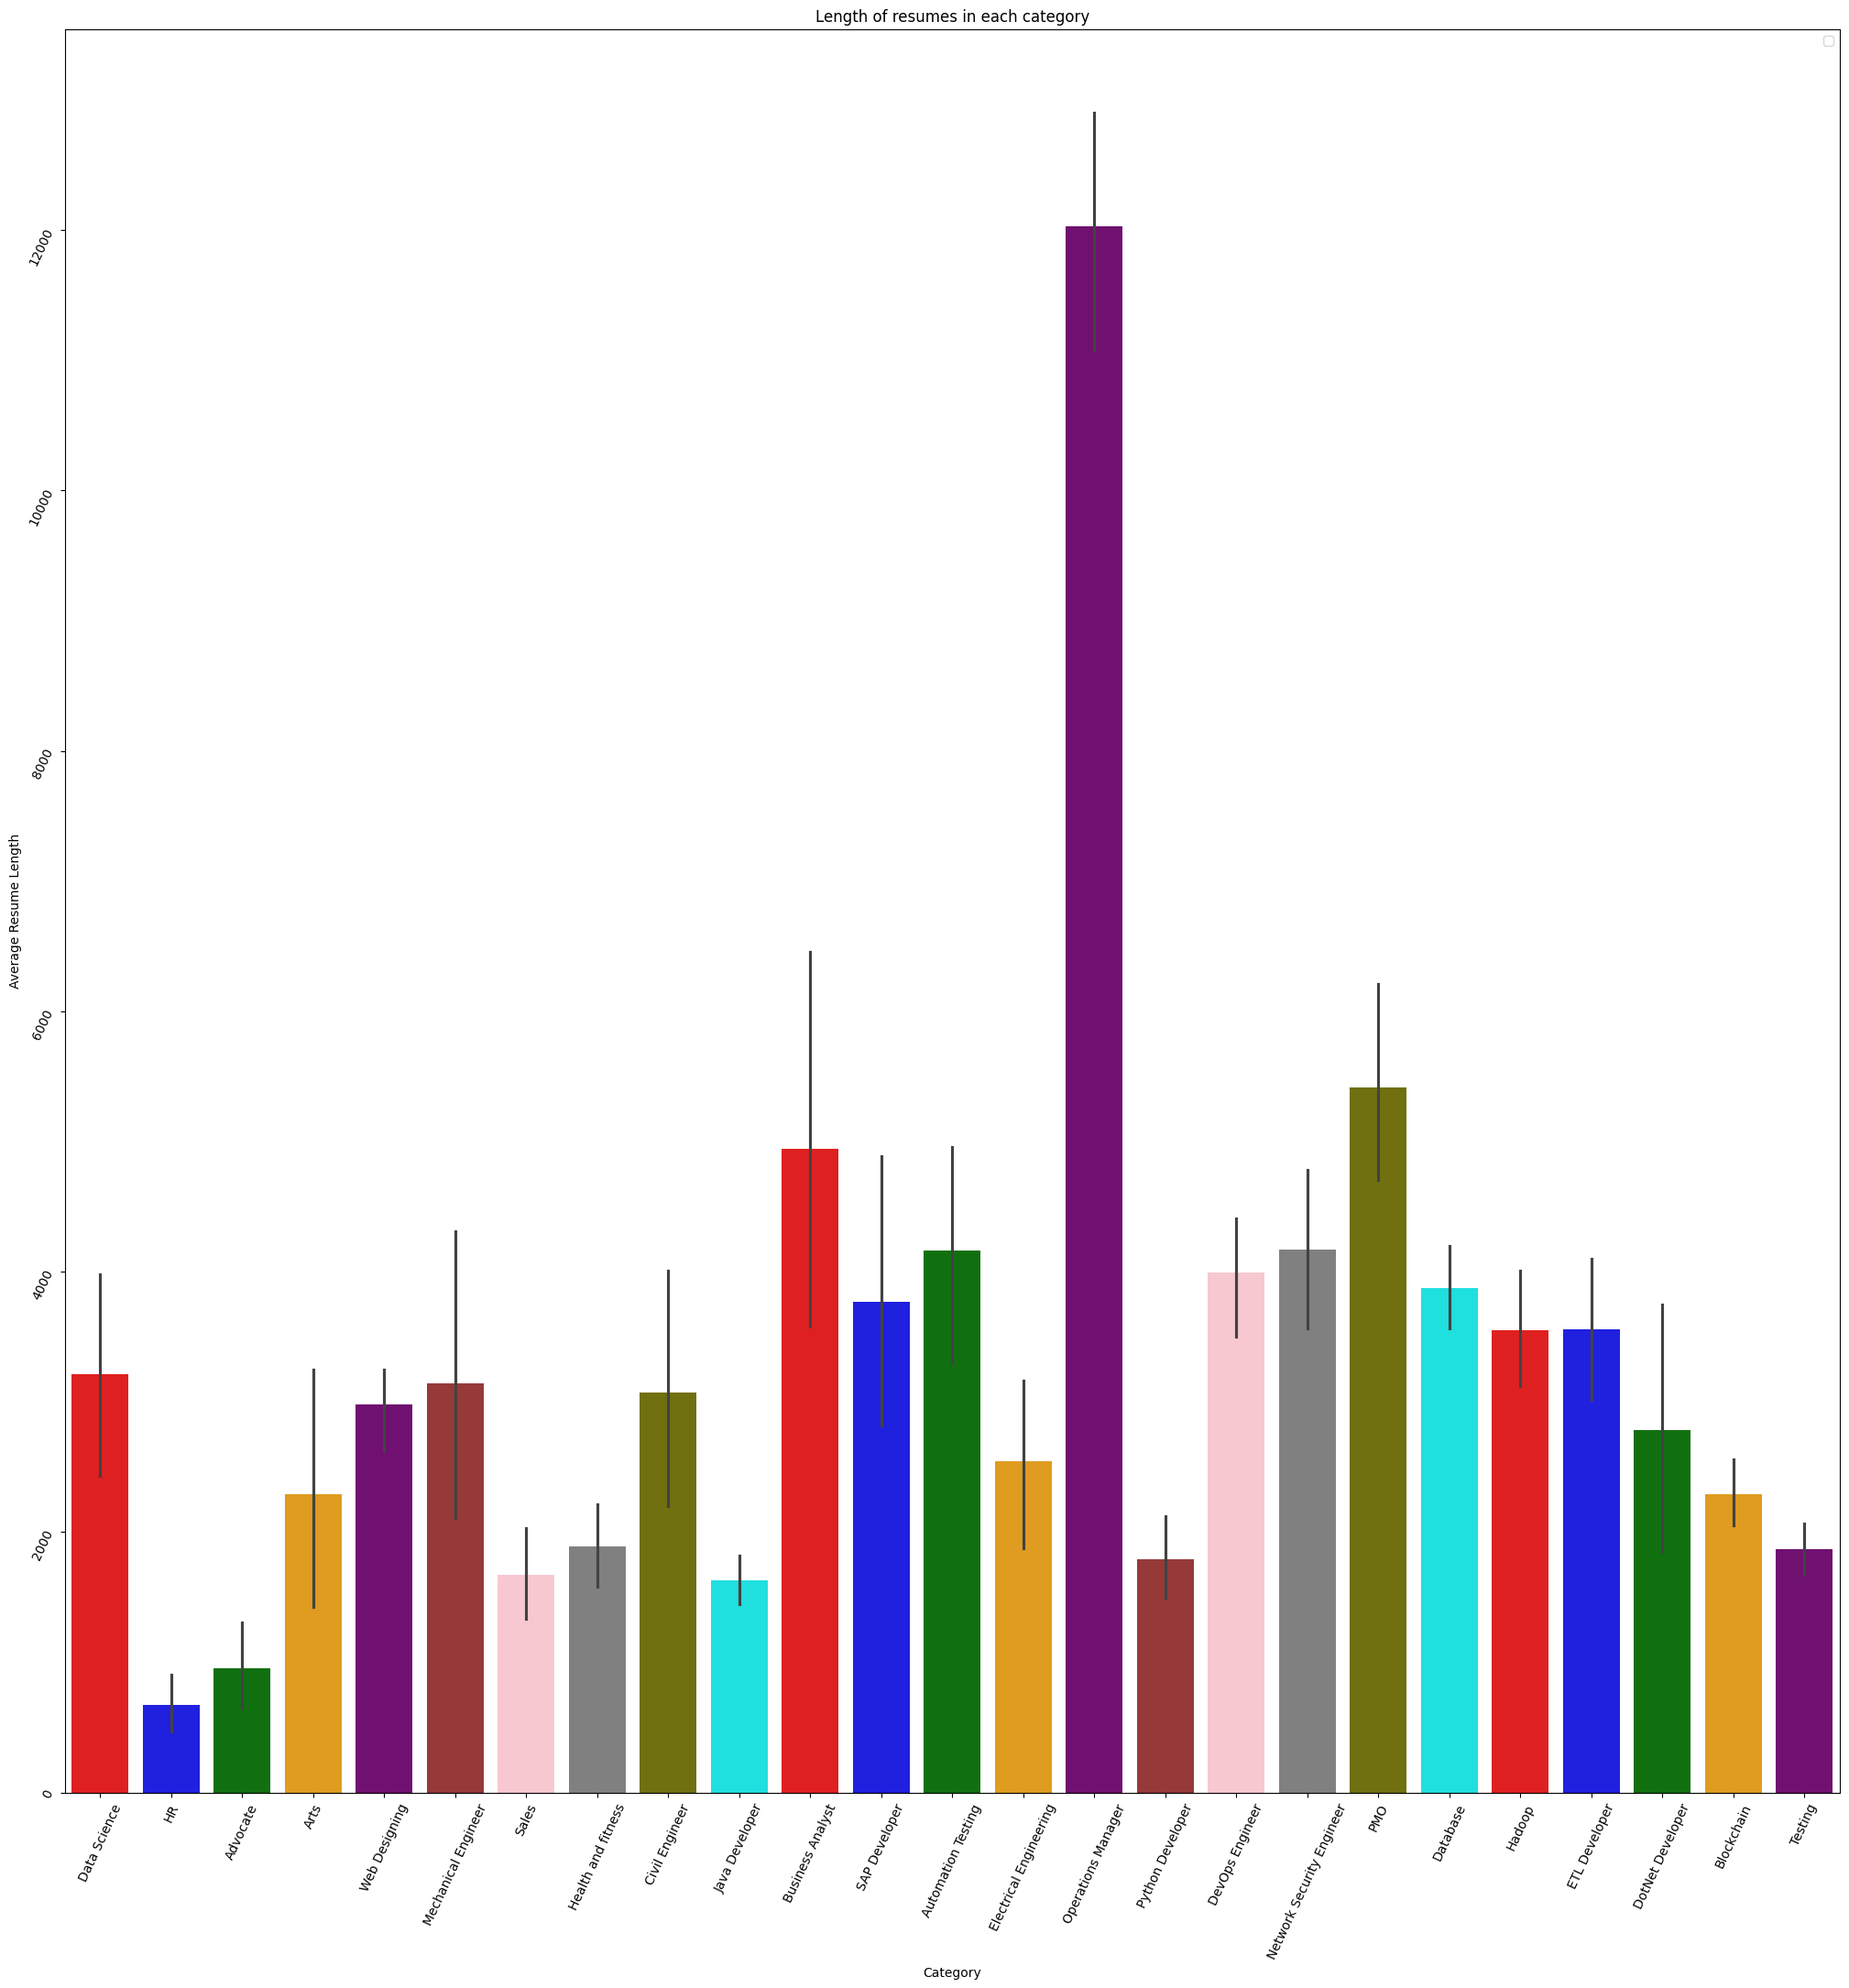

In [24]:
# plot the graph corresponding to the length of resumes in each category -->
plt.figure(figsize=(25,25))
plt.xticks(rotation=65)
plt.yticks(rotation=65)
plt.title("Length of resumes in each category")
# Define a list of colors, one for each category
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
# Adjust the number of colors to match the number of categories in your data
# If you have more categories, add more colors to the list
# Use 'Category' for x-axis and aggregate 'Resume' length using a bar plot
sns.barplot(x="Category", y=df['Resume'].str.len(), data=df, estimator=np.mean, palette=colors)
# estimator=np.mean calculates the average resume length for each category
# Use the 'palette' argument to assign colors to the bars
plt.xlabel('Category')
plt.ylabel('Average Resume Length')
plt.legend(loc='best')
plt.show()

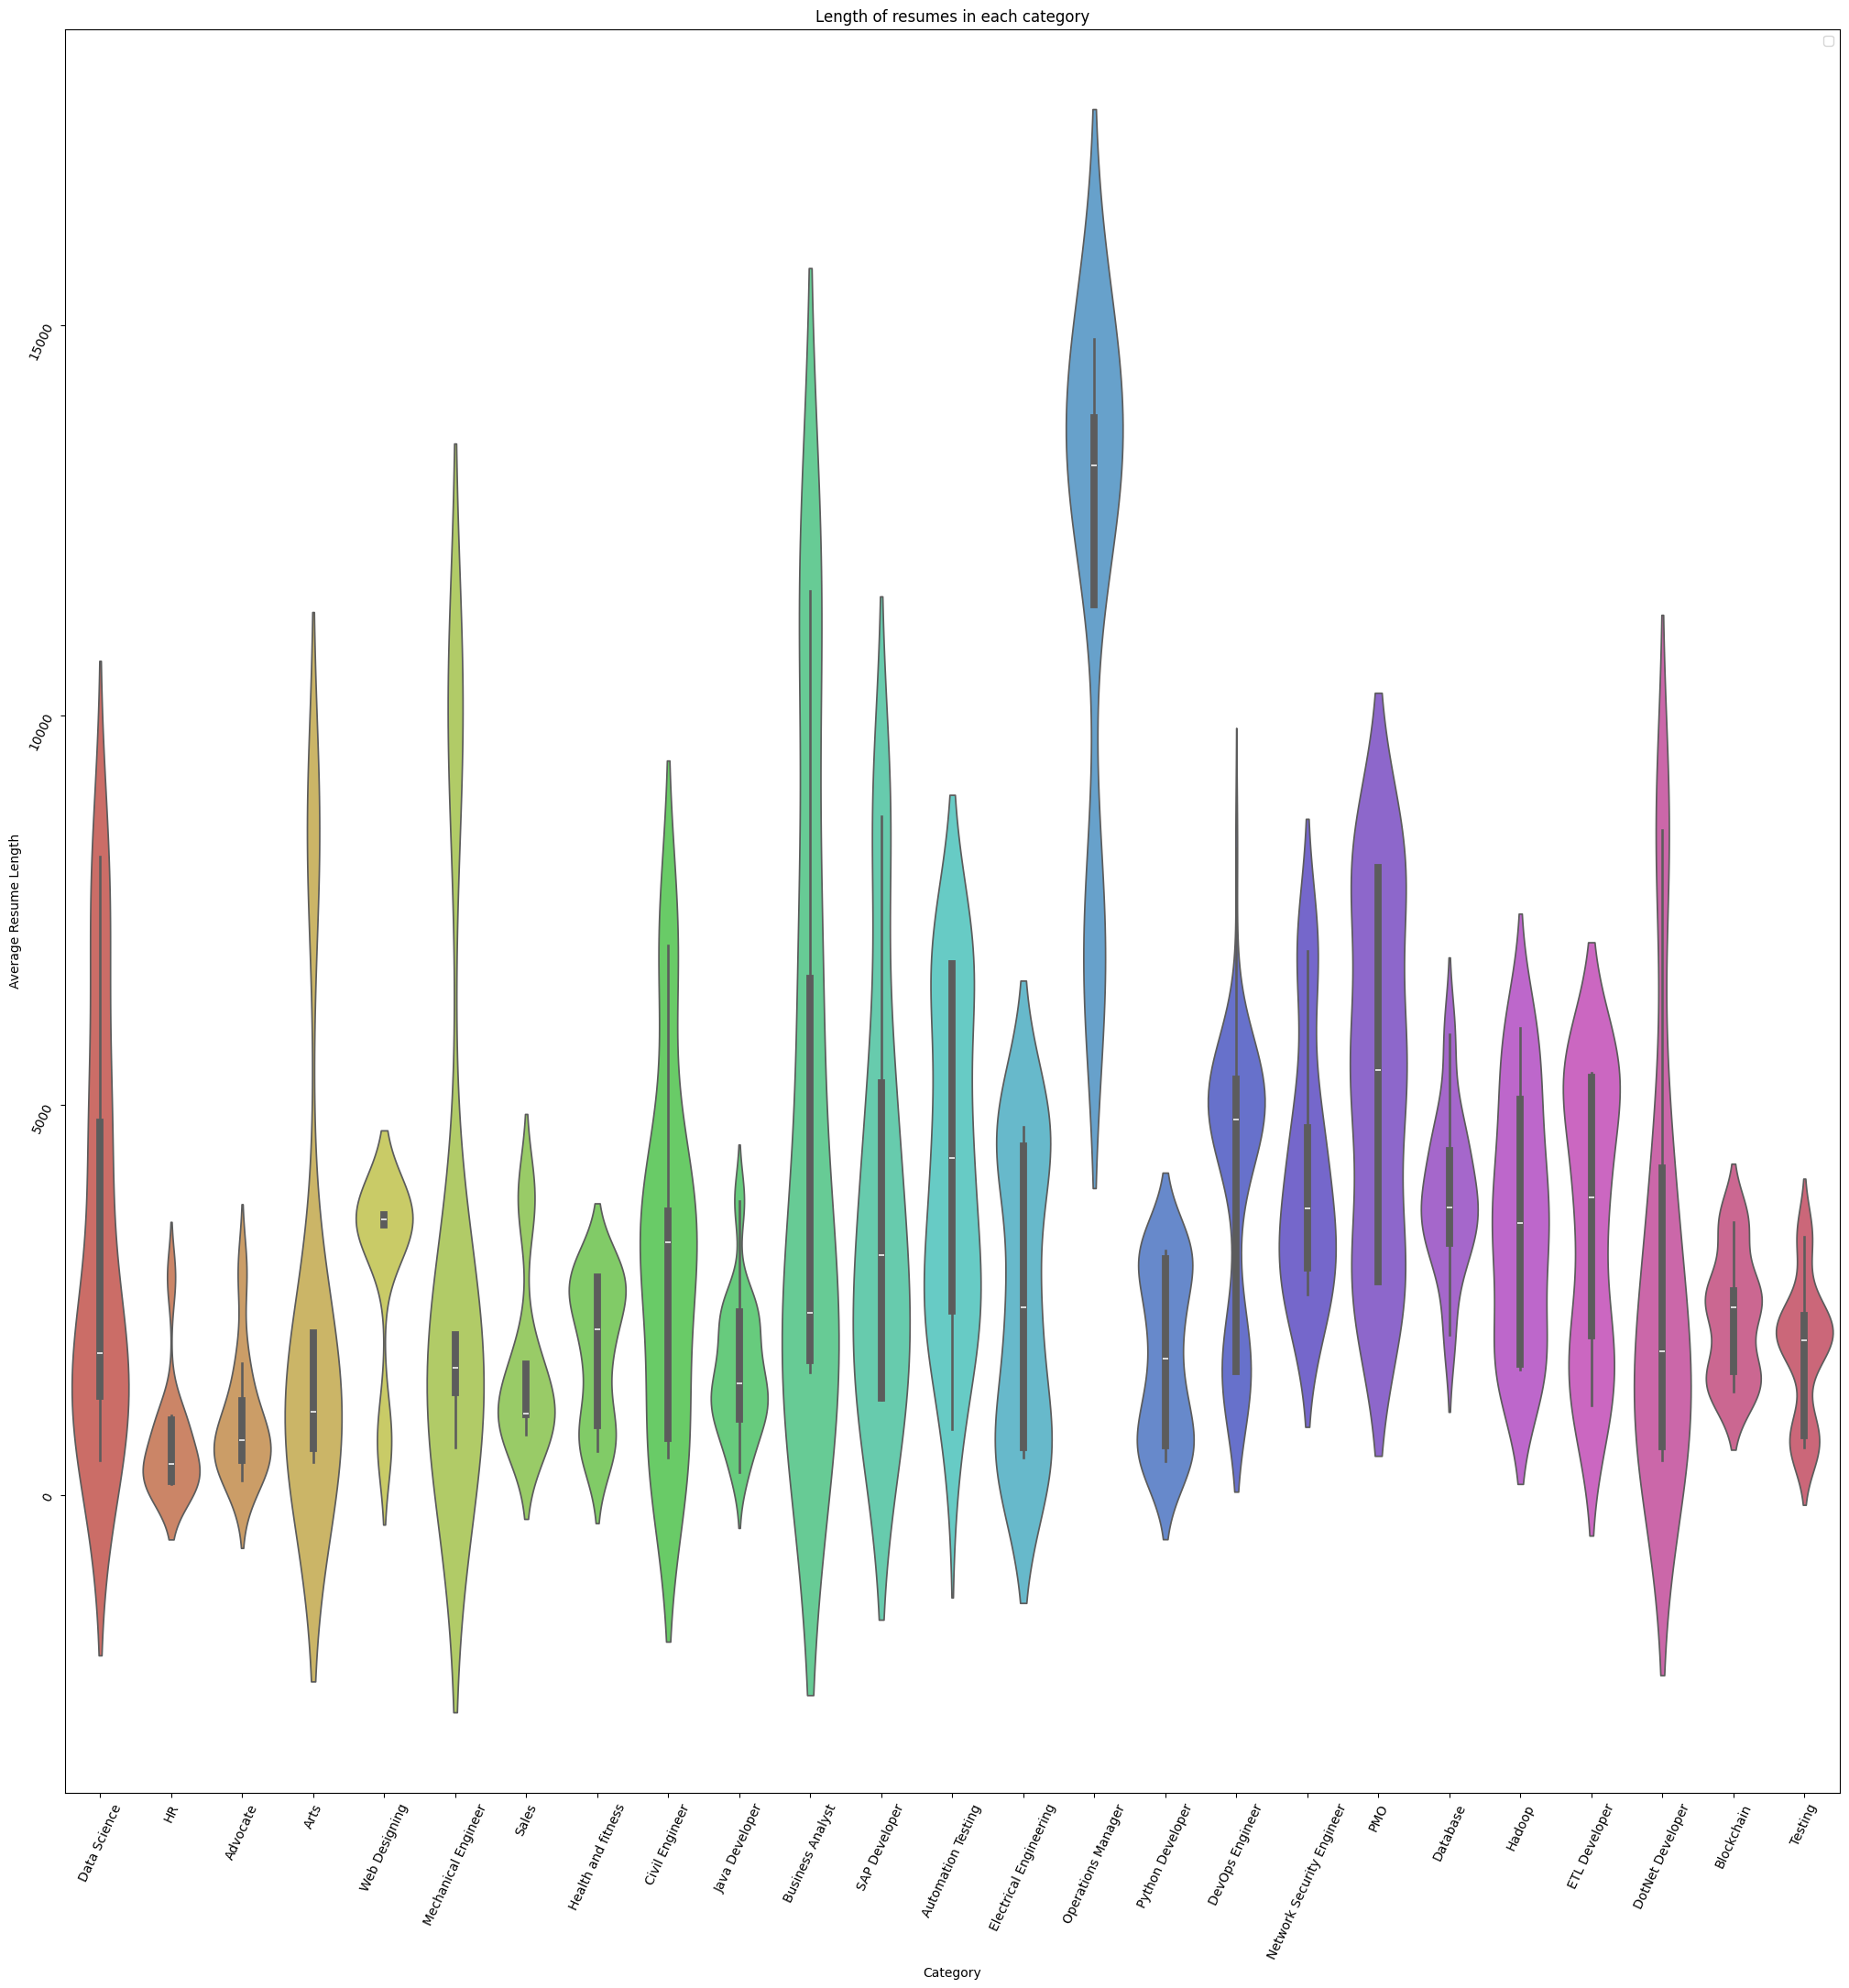

In [25]:
# plot the graph corresponding to the length of resumes in each category --> voilin plot
plt.figure(figsize=(25,25))
plt.xticks(rotation=65)
plt.yticks(rotation=65)
plt.title("Length of resumes in each category")
sns.violinplot(x="Category", y=df['Resume'].str.len(), data=df, palette='hls')
# Use the 'palette' argument to assign colors to the bars
plt.xlabel('Category')
plt.ylabel('Average Resume Length')
plt.legend(loc='best')
plt.show()

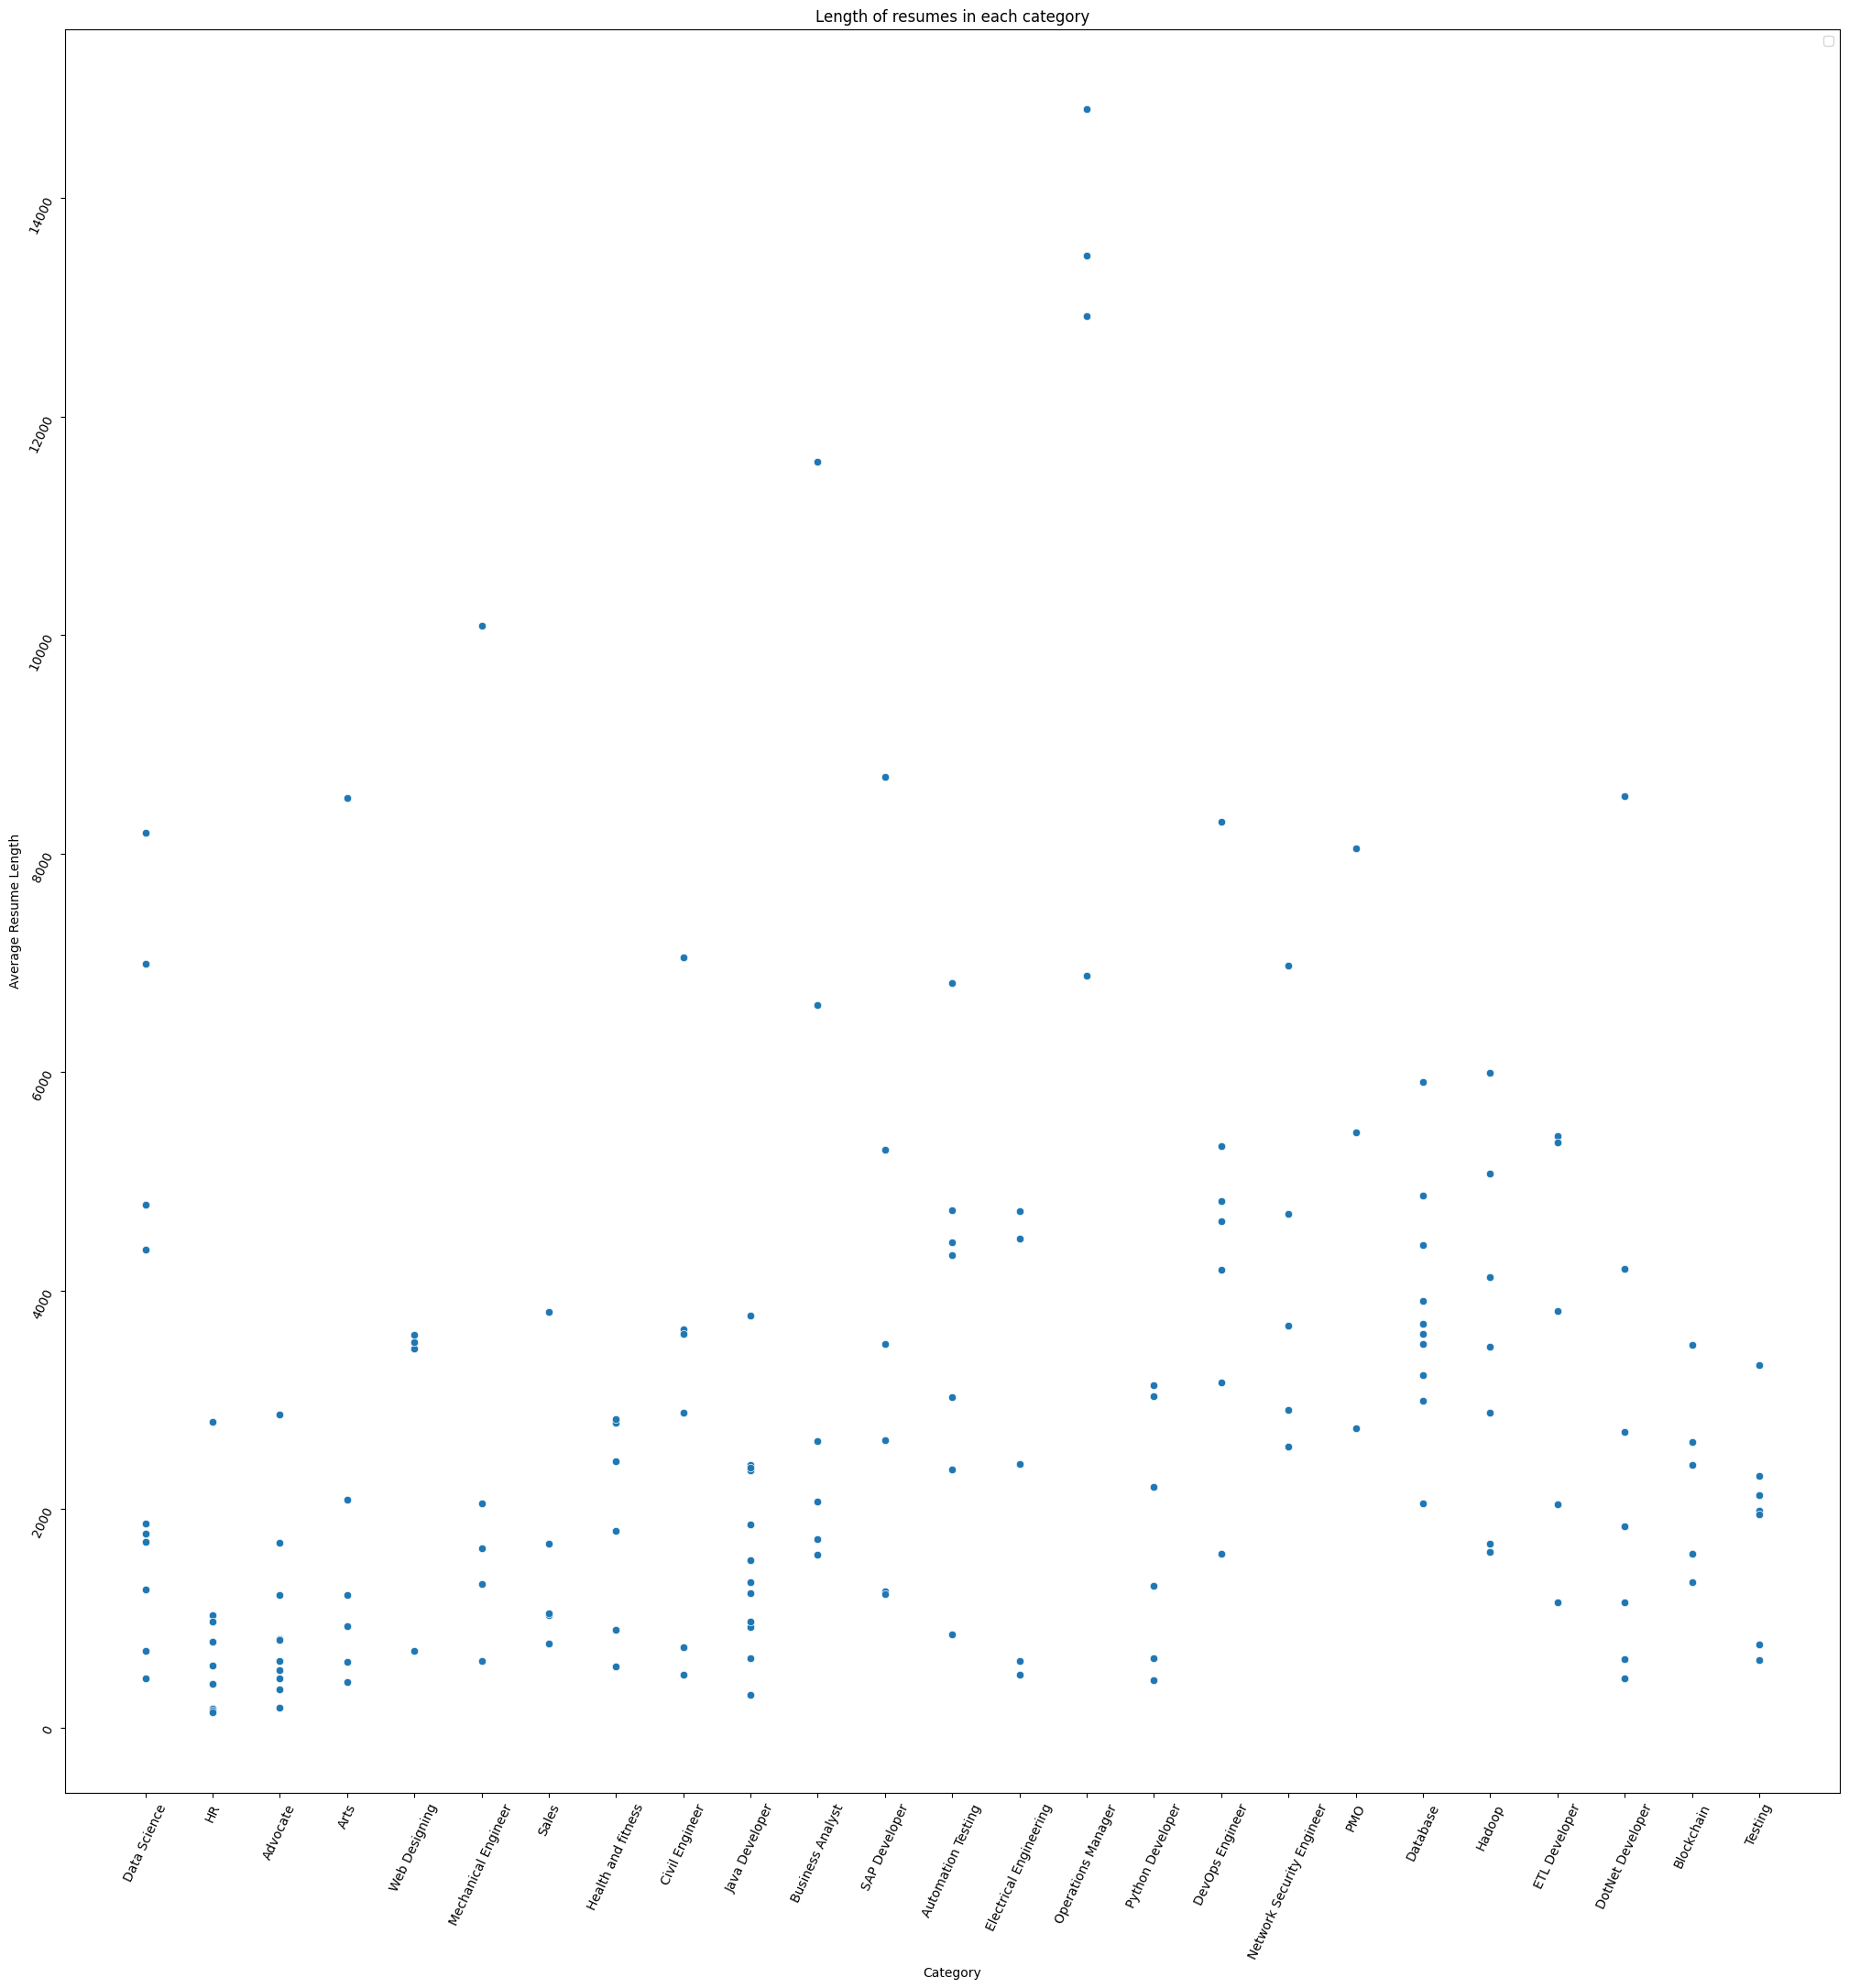

In [26]:
# plot the graph corresponding to the length of resumes in each category --> scatter plot
plt.figure(figsize=(25,25))
plt.xticks(rotation=65)
plt.yticks(rotation=65)
plt.title("Length of resumes in each category")
sns.scatterplot(x="Category", y=df['Resume'].str.len(), data=df, palette="hls")
plt.xlabel('Category')
plt.ylabel('Average Resume Length')
plt.legend(loc='best')
plt.show()

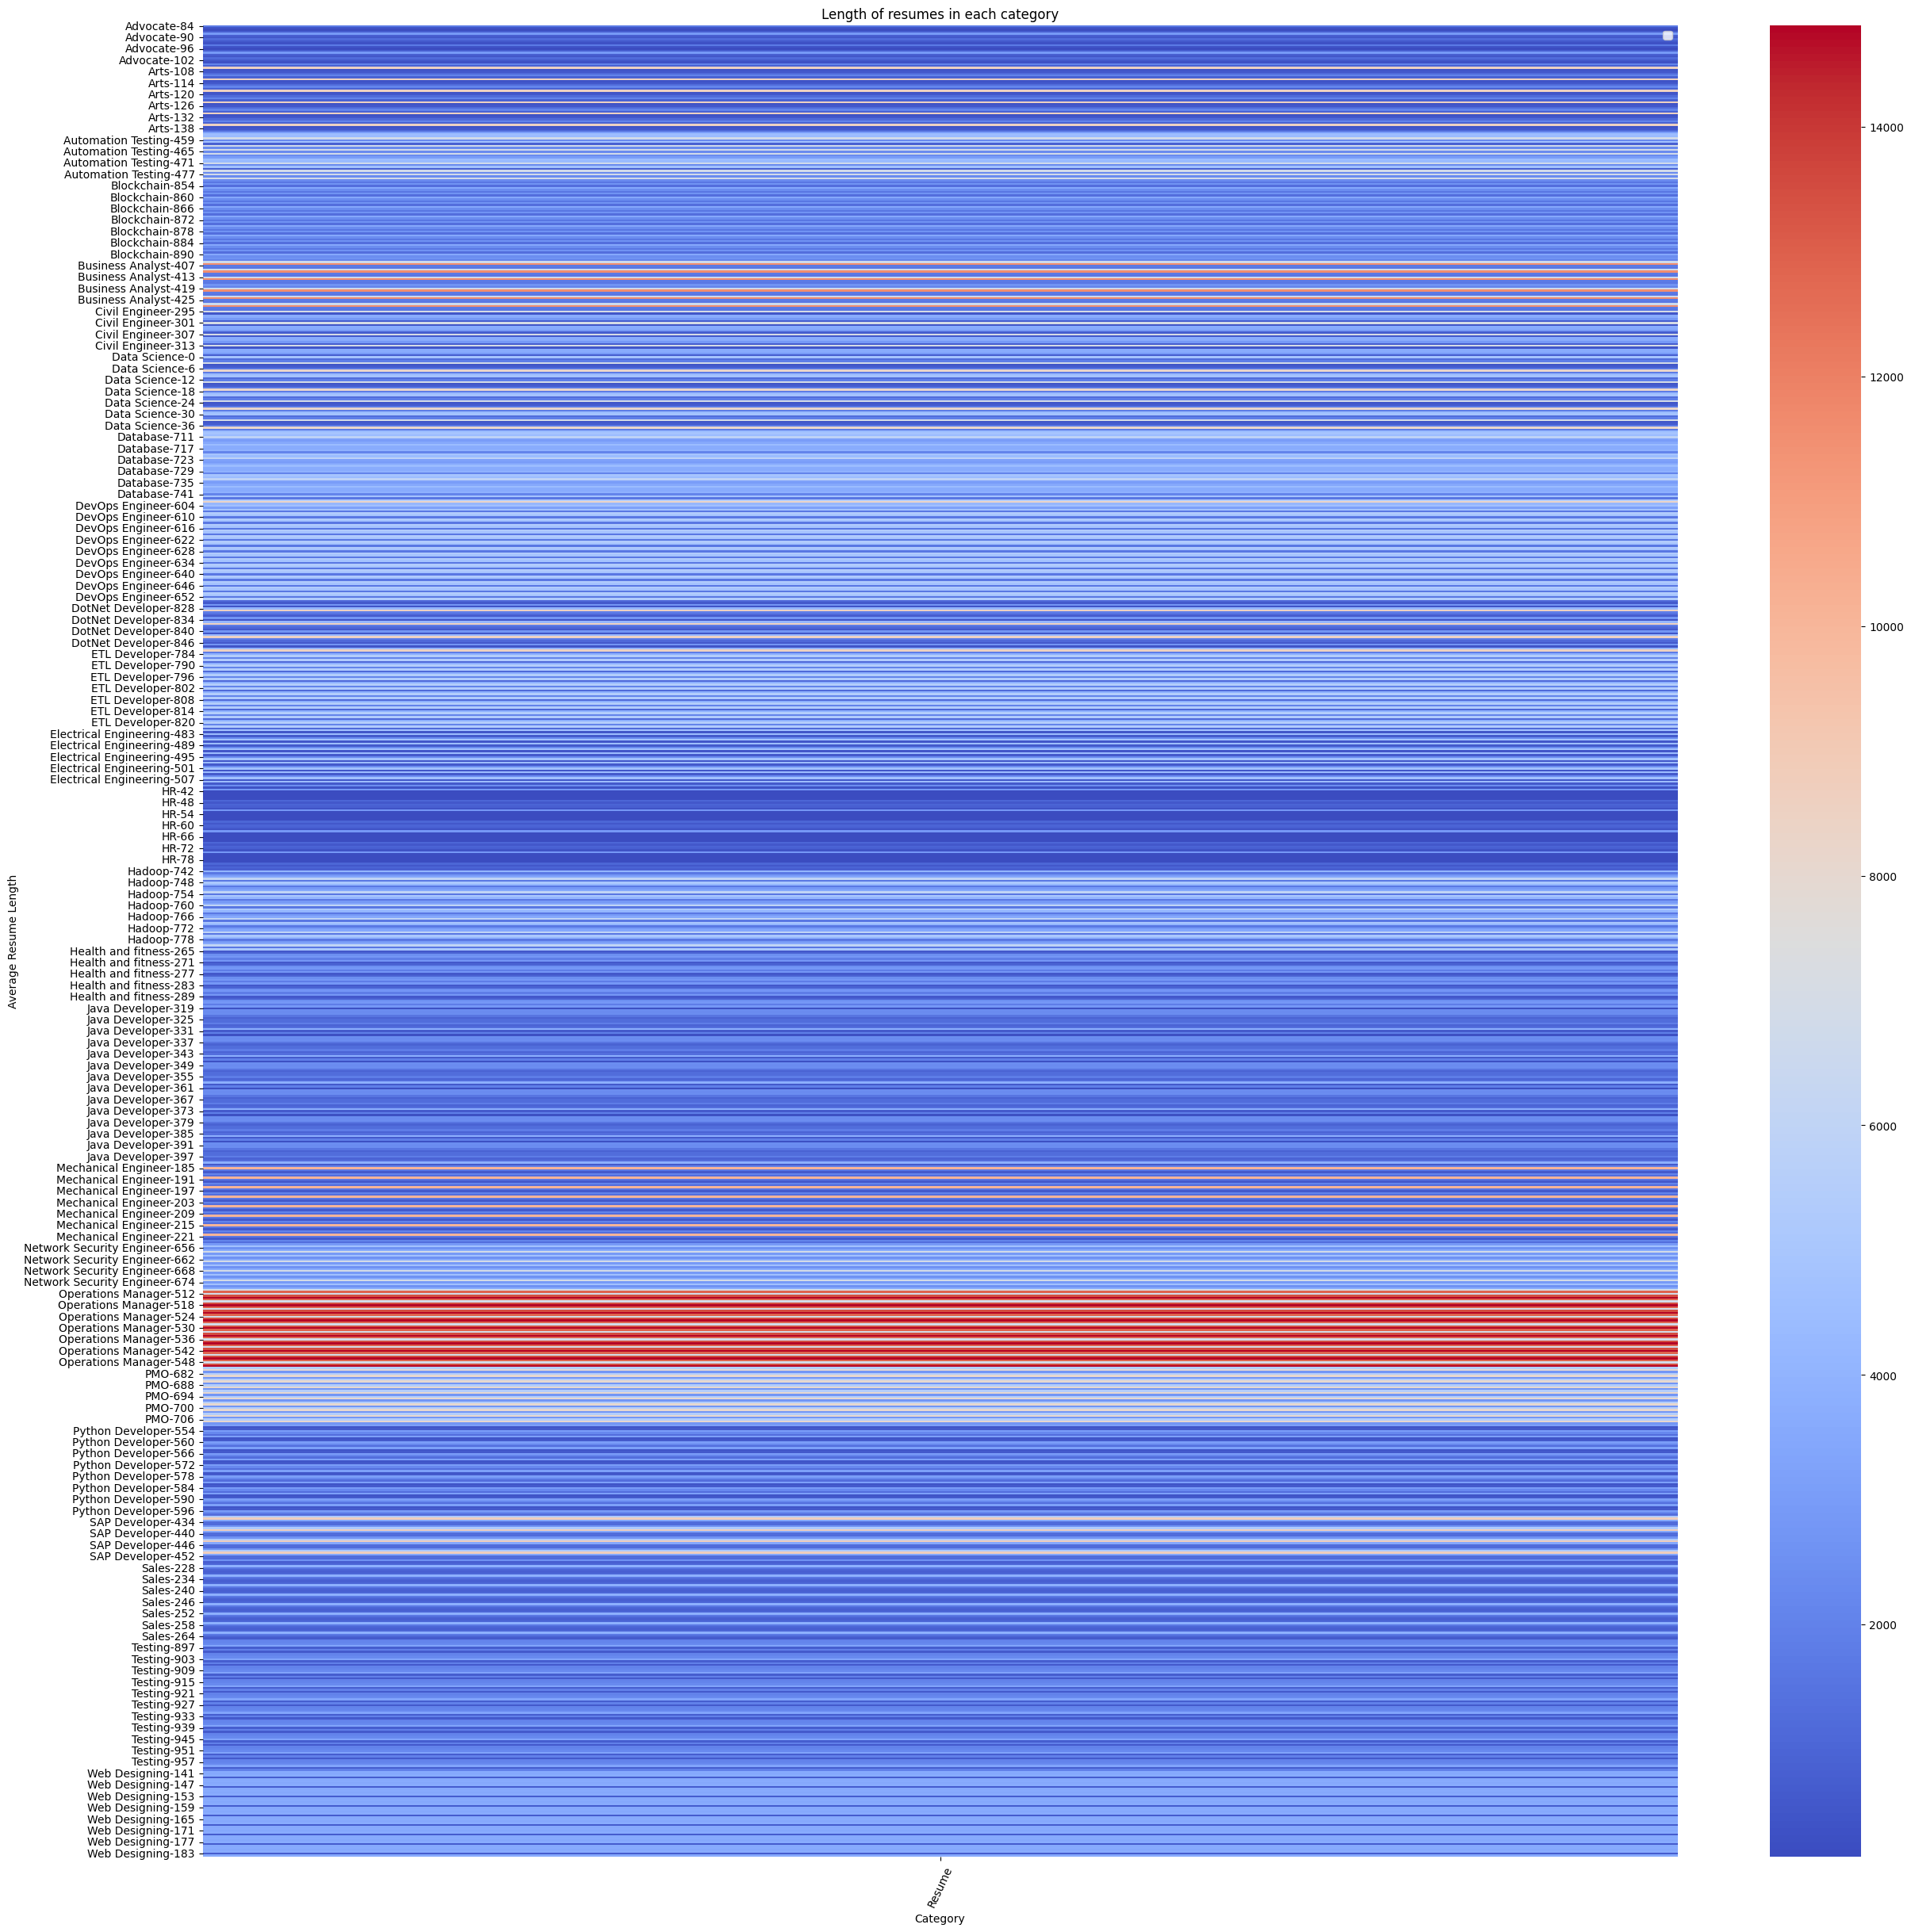

In [27]:
# plot the graph corresponding to the length of resumes in each category --> heatmap
plt.figure(figsize=(30,30))
plt.xticks(rotation=65)
plt.yticks(rotation=65)
plt.title("Length of resumes in each category")
sns.heatmap(df.groupby('Category')['Resume'].apply(lambda x: x.str.len()).to_frame(), cmap="coolwarm")
plt.xlabel('Category')
plt.ylabel('Average Resume Length')
plt.legend(loc='best')
plt.show()

In [28]:
# Exploring Resume --->
df['Category'][0]

'Data Science'

In [29]:
df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

In [30]:
df['Category'][90]

'Advocate'

In [31]:
df['Resume'][90]

'Skills: Natural Languages: Proficient in English, Hindi and Marathi. Computer skills: Proficient with MS-Office, Internet operation.Education Details \r\nJanuary 2015 to January 2018 LLB Law Mumbai, Maharashtra Mumbai university\r\nJanuary 2015 B.M.M  Mumbai, Maharashtra S.K.Somaiya College, Mumbai University\r\n H.S.C   Asmita Girls junior College, Maharashtra Board\r\n S.S.C Vidya Bhawan  Maharashtra Board\r\nAdvocate \r\n\r\nLlb student and Journalist\r\nSkill Details \r\nCompany Details \r\ncompany - Criminal lawyer (law firm)\r\ndescription - '

In [32]:
df['Category'][900]

'Testing'

In [33]:
df['Resume'][900]

"COMPUTER PROFICIENCY â\x80¢ Basic: MS-Office (PowerPoint, word, Outlook, Excel) â\x80¢ Language Known: Basics of C, CPP, Java. â\x80¢ Basics of Networking â\x80¢ Basics command of Linux PROJECT DETAILS Minor Project Details: â\x80¢ Title: Applocker for Android. â\x80¢ Project Area: Android Application. â\x80¢ Description: Applocker provides the protection of the System applications as well as the Third party applications installed in the Android devices. The password protection is provided with the help of patterns of volume keys. Hence, an extra measure of privacy is acquired. Major Project Details: â\x80¢ Title: Online Complaint System For Cyber Crimes. â\x80¢ Project Area: Android Application â\x80¢ Description: Online Complaint System for Cyber Crimes is an android application which will be in use after a person lodged a complaint in Police station regarding cyber crime but no action has been taken against it within the prescribed time constraint. Such person will directly use thi

Step-04: Data Cleaning using NLP

In [34]:
# urls, hashtags, mentions, special letters, punctuations ....... ---> remove it by using regular expressions

In [35]:
# import regular expression library ---->
import re
import string
def cleanresume(resumetext):
    resumetext = resumetext.lower()
    resumetext = re.sub('http\S+\s*', ' ', resumetext)            # remove URL's
    resumetext = re.sub('RT|cc', ' ', resumetext)                # remove RT & cc
    resumetext = re.sub('#\S+', '', resumetext)                  # remove hashtags
    resumetext = re.sub('@\S+', '  ', resumetext)                # remove mentions
    resumetext = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumetext)           # remove punctuations
    resumetext = re.sub(r'[^\x00-\x7f]',r' ', resumetext)
    resumetext = re.sub('\s+', ' ', resumetext)                 # remove extra whitespace
    return resumetext

In [36]:
cleanresume("my #### $ #  #unoorseed website like is this http://heloword and access it @gmain.com")

'my website like is this and a ess it '

In [37]:
df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

In [38]:
cleanresume(df['Resume'][0])

'skills programming languages python pandas numpy scipy scikit learn matplotlib sql java javascript jquery machine learning regression svm na ve bayes knn random forest decision trees boosting techniques cluster analysis word embedding sentiment analysis natural language processing dimensionality reduction topic modelling lda nmf pca neural nets database visualizations mysql sqlserver cassandra hbase elasticsearch d3 js dc js plotly kibana matplotlib ggplot tableau others regular expression html css angular 6 logstash kafka python flask git docker computer vision open cv and understanding of deep learning education details data science assurance associate data science assurance associate ernst young llp skill details javascript exprience 24 months jquery exprience 24 months python exprience 24 monthscompany details company ernst young llp description fraud investigations and dispute services assurance technology assisted review tar technology assisted review assists in a elerating the 

In [39]:
df['NewResume'] = df['Resume'] = df['Resume'].apply(lambda x: cleanresume(x))
print(df['NewResume'][0])

skills programming languages python pandas numpy scipy scikit learn matplotlib sql java javascript jquery machine learning regression svm na ve bayes knn random forest decision trees boosting techniques cluster analysis word embedding sentiment analysis natural language processing dimensionality reduction topic modelling lda nmf pca neural nets database visualizations mysql sqlserver cassandra hbase elasticsearch d3 js dc js plotly kibana matplotlib ggplot tableau others regular expression html css angular 6 logstash kafka python flask git docker computer vision open cv and understanding of deep learning education details data science assurance associate data science assurance associate ernst young llp skill details javascript exprience 24 months jquery exprience 24 months python exprience 24 monthscompany details company ernst young llp description fraud investigations and dispute services assurance technology assisted review tar technology assisted review assists in a elerating the r

Step-05: Data Encoding

In [40]:
df['Category']                   # its of string type , machine can't understand it so convert it into numerical value

,Category
0,Data Science
1,Data Science
2,Data Science
3,Data Science
4,Data Science
...,...
957,Testing
958,Testing
959,Testing
960,Testing


In [41]:
df['Category'].dtypes

dtype('O')

In [42]:
# convert words into categorical values ---->
 # ['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
 #      'Mechanical Engineer', 'Sales', 'Health and fitness',
 #     'Civil Engineer', 'Java Developer', 'Business Analyst',
 #      'SAP Developer', 'Automation Testing', 'Electrical Engineering',
 #      'Operations Manager', 'Python Developer', 'DevOps Engineer',
 #      'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
 #      'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
 #     dtype=object)
 # convert this into numerical values ----> label-encoder and one hot encoding techiniques
 # so that it can be used as an input for an algorithm to process it

In [43]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Category_Encoded'] = le.fit_transform(df['Category'])
print(df['Category_Encoded'])

0       6
1       6
2       6
3       6
4       6
       ..
957    23
958    23
959    23
960    23
961    23
Name: Category_Encoded, Length: 962, dtype: int64


In [44]:
print(df['Category_Encoded'].unique())

[ 6 12  0  1 24 16 22 14  5 15  4 21  2 11 18 20  8 17 19  7 13 10  9  3
 23]


Vectorization techniques ---> TFIDF Vectorizer

In [45]:
df['NewResume'][0]             # convert the sentences into individual vectors using vectorization techniques {tfidf-vectorizer}

'skills programming languages python pandas numpy scipy scikit learn matplotlib sql java javascript jquery machine learning regression svm na ve bayes knn random forest decision trees boosting techniques cluster analysis word embedding sentiment analysis natural language processing dimensionality reduction topic modelling lda nmf pca neural nets database visualizations mysql sqlserver cassandra hbase elasticsearch d3 js dc js plotly kibana matplotlib ggplot tableau others regular expression html css angular 6 logstash kafka python flask git docker computer vision open cv and understanding of deep learning education details data science assurance associate data science assurance associate ernst young llp skill details javascript exprience 24 months jquery exprience 24 months python exprience 24 monthscompany details company ernst young llp description fraud investigations and dispute services assurance technology assisted review tar technology assisted review assists in a elerating the 

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(stop_words='english')
tf.fit(df['NewResume'])
reqTxt = tf.fit_transform(df['NewResume'])                # tfidf function --> newresume k hrr column ko vectors k form m represent krega which is easily understable by machine for same and another document
print(reqTxt)

  (0, 6064)	0.011551389068684262
  (0, 5138)	0.01942500125169322
  (0, 3695)	0.017672987749757528
  (0, 5245)	0.11703816505183046
  (0, 4721)	0.03494131923139755
  (0, 4469)	0.02942271848037638
  (0, 5841)	0.04107654148630108
  (0, 5839)	0.11524161920061063
  (0, 3738)	0.074452710066349
  (0, 4051)	0.08215308297260215
  (0, 6223)	0.015685810486562833
  (0, 3519)	0.01634223218158362
  (0, 3521)	0.08243572456982735
  (0, 3563)	0.09026433513918582
  (0, 3910)	0.023150870901330483
  (0, 3742)	0.043820156493969184
  (0, 5456)	0.026649499404355723
  (0, 6437)	0.04107654148630108
  (0, 4322)	0.06794885623564809
  (0, 7021)	0.07924699911646275
  (0, 820)	0.07924699911646275
  (0, 3638)	0.04107654148630108
  (0, 5327)	0.03647139302804103
  (0, 2721)	0.03962349955823138
  (0, 1830)	0.026760050060945516
  :	:
  (961, 3564)	0.10460596461622534
  (961, 5041)	0.1201833496608096
  (961, 6592)	0.1838449792464465
  (961, 3341)	0.1454768687581809
  (961, 6737)	0.13231836810245687
  (961, 498)	0.17690154

In [47]:
reqTxt            # looks like a sparse identity matrix --> which increases no. of columns in dataset as count incresase for each word it constructs sparse matrix

<962x7333 sparse matrix of type '<class 'numpy.float64'>'
	with 164143 stored elements in Compressed Sparse Row format>

In [48]:
df.head(n=4)

,Category,Resume,NewResume,Category_Encoded
0,Data Science,skills programming languages python pandas num...,skills programming languages python pandas num...,6
1,Data Science,education details may 2013 to may 2017 b e uit...,education details may 2013 to may 2017 b e uit...,6
2,Data Science,areas of interest deep learning control system...,areas of interest deep learning control system...,6
3,Data Science,skills r python sap hana tableau sap hana sql ...,skills r python sap hana tableau sap hana sql ...,6


In [49]:
# now drop unwanted columns --->
# df.drop(['Resume', 'Category'], axis=1, inplace=True)
# df.head(n=4)

In [50]:
df.head(n=4)

,Category,Resume,NewResume,Category_Encoded
0,Data Science,skills programming languages python pandas num...,skills programming languages python pandas num...,6
1,Data Science,education details may 2013 to may 2017 b e uit...,education details may 2013 to may 2017 b e uit...,6
2,Data Science,areas of interest deep learning control system...,areas of interest deep learning control system...,6
3,Data Science,skills r python sap hana tableau sap hana sql ...,skills r python sap hana tableau sap hana sql ...,6


In [51]:
df.tail(n=4)

,Category,Resume,NewResume,Category_Encoded
958,Testing,willingness to a ept the challenges positive ...,willingness to a ept the challenges positive ...,23
959,Testing,personal skills quick learner eagerness to lea...,personal skills quick learner eagerness to lea...,23
960,Testing,computer skills software knowledge ms power po...,computer skills software knowledge ms power po...,23
961,Testing,skill set os windows xp 7 8 8 1 10 database my...,skill set os windows xp 7 8 8 1 10 database my...,23


Step-06: Data Splitting

In [52]:
# X --> reqTxt
# y --> category_encoded

In [53]:
# x_train , y_train ---> used for training the dataset (80%)
# y_test , x_test ---> used for testing and make prediction on data (20%)

In [79]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(reqTxt, df['Category_Encoded'], test_size=0.2, random_state=1)

In [80]:
x_train.shape                  # 80% rows -> train value

(769, 7333)

In [82]:
x_test.shape                   # 20% rows -> test value

(193, 7333)

In [83]:
y_train.shape

(769,)

In [84]:
y_test.shape

(193,)

Step-07: Model Building and Training

In [72]:
# since its a multi-class classification problem we can train the model using ----> KNN, SVM, Naive-Byes, Desicion-tree, RFC
# model-1 : KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, classification_report
# created the object of KNN model
knn = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=5))
# fit / train the model
knn.fit(x_train, y_train)

OneVsRestClassifier(estimator=KNeighborsClassifier())

In [105]:
# make predictions on test data
y_pred_knn = knn.predict(x_test)
print(y_pred_knn)           # predicts categories / labels

# print the accuracy_score and classification_report
print("Accuracy Score: ", accuracy_score(y_test, y_pred_knn))
print("Classification Report: ", classification_report(y_test, y_pred_knn))

[22  3 18 23 15  5  3 14  6 12  2 15 16  1  9 19  0 10  9  0 22 15 20  0
  2 19 22 15  6  4  3 22 12 15  6 21  5 10 22  8 23 13 16 15 16 17  5  7
  5 20  1 24 23 21  4 11 23  3  3 18 21  8  6 11  2  4  4 20  5  8 16 11
 23 18 11  7  8 24 23 12  9 20 17  8 24 20 21 17 20  4 17  4  3 22  3  1
  8 14 19  6 23 12 10 20  3 19 14 23  5  8 24 10 13 18 21  1 12  7 15  2
 23  1  3 23 24 15  7 22 22 15 23 15  6 21 12 21  2 15  0  3 16  1 22 21
  2 10 13 15 12 16 20 18  7 17 22 12 16 17 11 17 15 18  3 18  3 16 20  9
 19 20 18 17 24  5 23 11 12 11  8  6 10 20 22 15 10 16 10 24  8 12 14 10
  3]
Accuracy Score:  0.9844559585492227
Classification Report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6
           2       0.83      1.00      0.91         5
           3       1.00      1.00      1.00        13
           4       1.00      1.00      1.00         6
           5       1.00   

In [77]:
# model-2: SVM
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, classification_report

# created the object of SVM model
svm = OneVsRestClassifier(SVC(kernel='linear',random_state=1))

# fit / train the model
svm.fit(x_train, y_train)

OneVsRestClassifier(estimator=SVC(kernel='linear', random_state=1))

In [104]:
# make predictions on test data
y_pred_svm = svm.predict(x_test)
print(y_pred_svm)


# print the accuracy_score and classification_report
print("Accuracy Score: ", accuracy_score(y_test, y_pred_svm))
print("Classification Report: ", classification_report(y_test, y_pred_svm))

[22  3 18 23 15  5  3 14  6 12  8 15 16  1  9 19  0 10  9  0 22 15 20  0
  2 19 22 15  6  4  3 22 12 15  6 21  5 10 22  8 23 13 16 15 16 17  5  7
  5 20  1 24 23 21  4 11 23  3  3 18 21  8  6 11  2  4  4 20  5  8 16 11
 23 18 11  7  8 24 23 12  9 20 17  8 24 20  6 17 20  4 17  4  3 22  3  1
  8 14 19  6 23 12 10 20  3 19 14 23  5  8 24 10 13 18  6  1 12  7 15  2
 23  1  3 23 24 15  7 22 22 15 23 15  6 21 12 21  2 15  0  3 16  1 22 21
  2 10 13 15 12 16 20 18  7 17 22 12 16 17 11 17 15 18  3 18  3 16 20  9
 19 20 18 17 24  5 23 11 12 11  8  6 10 20 22 15 10 16 10 24  8 12 14 10
  3]
Accuracy Score:  1.0
Classification Report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00        13
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.

In [106]:
# model-3: Naive-Bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, classification_report

# created the object of Naive-Biayes
nb = OneVsRestClassifier(MultinomialNB())

# fit / train the model
nb.fit(x_train, y_train)

OneVsRestClassifier(estimator=MultinomialNB())

In [107]:
# make predictions on test data
y_pred_nb = nb.predict(x_test)
print(y_pred_nb)

# print the accuracy_score and classification_report
print("Accuracy Score: ", accuracy_score(y_test, y_pred_nb))
print("Classification Report: ", classification_report(y_test, y_pred_nb))

[22  3 18 23 15  5  3 14  6 12 23 15 16  1  9 19  0 10  9  0 22 15 20  0
  2 19 22 15  6  4  3 22 12 15  6 21  5 10 22  8 23 13 16 15 16 17  5  7
  5 20  1 24 23 21  4 11 23  3  3 18 21  8  6 11  2  4  4 20  5  8 16 11
 23 18 11  7  8 24 23 12  9 20 17  8 24 20  6 17 20  4 17  4  3 22  3  1
  8 14 19  6 23 12 10 20  3 19 14 23  5  8 24 10 13 18  6  1 12  7 15  2
 23  1  3 23 24 15  7 22 22 15 23 15  6 21 12 21 23 15  0  3 16  1 22 21
  2 10 13 15 12 16 20 18  7 17 22 12 16 17 11 17 15 18  3 18  3 16 20  9
 19 20 18 17 24  5 23 11 12 11  8  6 10 20 22 15 10 16 10 24  8 12 14 10
  3]
Accuracy Score:  0.9896373056994818
Classification Report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6
           2       1.00      0.80      0.89         5
           3       1.00      1.00      1.00        13
           4       1.00      1.00      1.00         6
           5       1.00   

In [108]:
# Model-4: Desicion Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, classification_report

# created the object of Desicion Tree
dt = OneVsRestClassifier(DecisionTreeClassifier(random_state=1))

# fit / train the model
dt.fit(x_train, y_train)

OneVsRestClassifier(estimator=DecisionTreeClassifier(random_state=1))

In [109]:
# make predictions on test data
y_pred_dt = dt.predict(x_test)
print(y_pred_dt)

# print the accuracy_score and classification_report
print("Accuracy Score: ", accuracy_score(y_test, y_pred_dt))
print("Classification Report: ", classification_report(y_test, y_pred_dt))

[22  3 18 23 15  5  3 14  6 12 24 15 16  1  9 19  0 10  9  0 22 15 20  0
  2 19 22 15  6  4  3 22 12 15  6 21  5 10 22  8 23 13 16 15 16 17  5  7
  5 20  1 24 23 21  4 11 23  3  3 18 21  8  6 11  2  4  4 20  5  8 16 11
 23 18 11  7  8 24 23 12  9 20 17  8 24 20  6 17 20  4 17  4  3 22  3  1
  8 14 19  6 23 12 10 20  3 19 14 23  5  8 24 10 13 18  6  1 12  7 15  2
 23  1  3 23 24 15  7 22 22 15 23 15  6 21 12 21  2 15  0  3 16  1 22 21
  2 10 13 15 12 16 20 18  7 17 22 12 16 17 11 17 15 18  3 18  3 16 20  9
 19 20 18 17 24  5 23 11 12 11  8  6 10 20 22 15 10 16 10 24  8 12 14 10
  3]
Accuracy Score:  0.9948186528497409
Classification Report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00        13
           4       1.00      1.00      1.00         6
           5       1.00   

In [110]:
# Model-5: Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, classification_report

# created the object of Random Forest Classifier
rf = OneVsRestClassifier(RandomForestClassifier(n_estimators=100,random_state=1))

# fit / train the model
rf.fit(x_train, y_train)

OneVsRestClassifier(estimator=RandomForestClassifier(random_state=1))

In [111]:
# make predictions on test data
y_pred_rf = dt.predict(x_test)
print(y_pred_rf)

# print the accuracy_score and classification_report
print("Accuracy Score: ", accuracy_score(y_test, y_pred_rf))
print("Classification Report: ", classification_report(y_test, y_pred_rf))

[22  3 18 23 15  5  3 14  6 12 24 15 16  1  9 19  0 10  9  0 22 15 20  0
  2 19 22 15  6  4  3 22 12 15  6 21  5 10 22  8 23 13 16 15 16 17  5  7
  5 20  1 24 23 21  4 11 23  3  3 18 21  8  6 11  2  4  4 20  5  8 16 11
 23 18 11  7  8 24 23 12  9 20 17  8 24 20  6 17 20  4 17  4  3 22  3  1
  8 14 19  6 23 12 10 20  3 19 14 23  5  8 24 10 13 18  6  1 12  7 15  2
 23  1  3 23 24 15  7 22 22 15 23 15  6 21 12 21  2 15  0  3 16  1 22 21
  2 10 13 15 12 16 20 18  7 17 22 12 16 17 11 17 15 18  3 18  3 16 20  9
 19 20 18 17 24  5 23 11 12 11  8  6 10 20 22 15 10 16 10 24  8 12 14 10
  3]
Accuracy Score:  0.9948186528497409
Classification Report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00        13
           4       1.00      1.00      1.00         6
           5       1.00   

Perform Cross-Validation

In [121]:
# perform cross-validation ---> Ensure robust evaluation by using cross-validation
# model-1 : KNN model
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, x_train, y_train, cv=5)
print("for KNN model:")
print(score)
print(score.mean())

# model-2 : SVC model
from sklearn.model_selection import cross_val_score
score = cross_val_score(svm, x_train, y_train, cv=5)
print("for SVM model:")
print(score)
print(score.mean())

# model-3 : Naive-Bayes model
from sklearn.model_selection import cross_val_score
score = cross_val_score(nb, x_train, y_train, cv=5)
print("for Naive-Bayes model:")
print(score)
print(score.mean())

# model-4 : DT model
from sklearn.model_selection import cross_val_score
score = cross_val_score(dt, x_train, y_train, cv=5)
print("for DT model:")
print(score)
print(score.mean())

# model-5 : RFC model
from sklearn.model_selection import cross_val_score
score = cross_val_score(rf, x_train, y_train, cv=5)
print("for RFC model:")
print(score)
print(score.mean())

for KNN model:
[0.96103896 0.98051948 0.95454545 0.97402597 0.97385621]
0.9687972158560394
for SVM model:
[1.         0.99350649 0.98701299 1.         1.        ]
0.996103896103896
for Naive-Bayes model:
[0.97402597 0.97402597 0.97402597 0.96103896 0.98039216]
0.9727018079959256
for DT model:
[1.         0.98701299 0.97402597 1.         0.99346405]
0.9909006026653084
for RFC model:
[1.         0.99350649 0.97402597 1.         0.99346405]
0.9921993039640098


Step-08: Model Evaluation

Accuracy of each model

In [112]:
# model accuracy comparison ---->
models = pd.DataFrame({
    'Model': ['KNN', 'SVM', 'Naive-Bayes', 'Decision-Tree', 'Random-Forest'],
    'Score': [accuracy_score(y_test, y_pred_knn), accuracy_score(y_test, y_pred_svm), accuracy_score(y_test, y_pred_nb), accuracy_score(y_test, y_pred_dt), accuracy_score(y_test, y_pred_rf)]})
models.sort_values(by='Score', ascending=False)

,Model,Score
1,SVM,1.000000
3,Decision-Tree,0.994819
4,Random-Forest,0.994819
2,Naive-Bayes,0.989637
0,KNN,0.984456


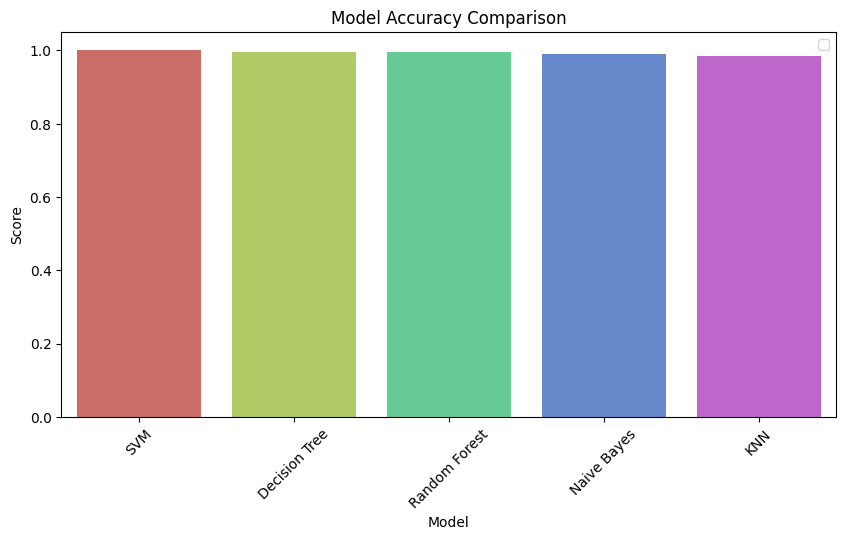

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have calculated accuracy scores for each model and stored them in variables
# like accuracy_knn, accuracy_svm, accuracy_nb, accuracy_dt, accuracy_rf, accuracy_xgb

# Create a dictionary to store model names and scores
model_data = {
    'Model': ['KNN', 'SVM', 'Naive Bayes', 'Decision Tree', 'Random Forest'],
    'Score': [accuracy_score(y_test,y_pred_knn),accuracy_score(y_test,y_pred_svm),accuracy_score(y_test,y_pred_nb),accuracy_score(y_test,y_pred_dt),accuracy_score(y_test,y_pred_rf)]
}

# Create a Pandas DataFrame from the dictionary
models = pd.DataFrame(model_data)

# Plot the line plot
plt.figure(figsize=(10, 5))
sns.barplot(x='Model', y='Score', data=models.sort_values(by='Score', ascending=False), palette="hls")
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
# plt.yticks(rotation=45)  # Remove y-axis label rotation if not needed
plt.legend(loc='best')
plt.show()

Classification-report of each model

In [119]:
# classification_report comparison of each models --->
print("Classification Report for KNN: \n", classification_report(y_test, y_pred_knn))
print("Classification Report for SVM: \n", classification_report(y_test, y_pred_svm))
print("Classification Report for Naive-Bayes: \n", classification_report(y_test, y_pred_nb))
print("Classification Report for Decision-Tree: \n", classification_report(y_test, y_pred_dt))
print("Classification Report for Random-Forest: \n", classification_report(y_test, y_pred_rf))

Classification Report for KNN: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6
           2       0.83      1.00      0.91         5
           3       1.00      1.00      1.00        13
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         7
           6       1.00      0.78      0.88         9
           7       1.00      1.00      1.00         5
           8       1.00      0.90      0.95        10
           9       1.00      1.00      1.00         4
          10       1.00      1.00      1.00         9
          11       1.00      1.00      1.00         7
          12       1.00      1.00      1.00        10
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         4
          15       1.00      1.00      1.00        14
          16       1.00      1.00      1.00     

In [143]:
y_pred_svm

array([22,  3, 18, 23, 15,  5,  3, 14,  6, 12,  8, 15, 16,  1,  9, 19,  0,
       10,  9,  0, 22, 15, 20,  0,  2, 19, 22, 15,  6,  4,  3, 22, 12, 15,
        6, 21,  5, 10, 22,  8, 23, 13, 16, 15, 16, 17,  5,  7,  5, 20,  1,
       24, 23, 21,  4, 11, 23,  3,  3, 18, 21,  8,  6, 11,  2,  4,  4, 20,
        5,  8, 16, 11, 23, 18, 11,  7,  8, 24, 23, 12,  9, 20, 17,  8, 24,
       20,  6, 17, 20,  4, 17,  4,  3, 22,  3,  1,  8, 14, 19,  6, 23, 12,
       10, 20,  3, 19, 14, 23,  5,  8, 24, 10, 13, 18,  6,  1, 12,  7, 15,
        2, 23,  1,  3, 23, 24, 15,  7, 22, 22, 15, 23, 15,  6, 21, 12, 21,
        2, 15,  0,  3, 16,  1, 22, 21,  2, 10, 13, 15, 12, 16, 20, 18,  7,
       17, 22, 12, 16, 17, 11, 17, 15, 18,  3, 18,  3, 16, 20,  9, 19, 20,
       18, 17, 24,  5, 23, 11, 12, 11,  8,  6, 10, 20, 22, 15, 10, 16, 10,
       24,  8, 12, 14, 10,  3])

Confusion Matrix

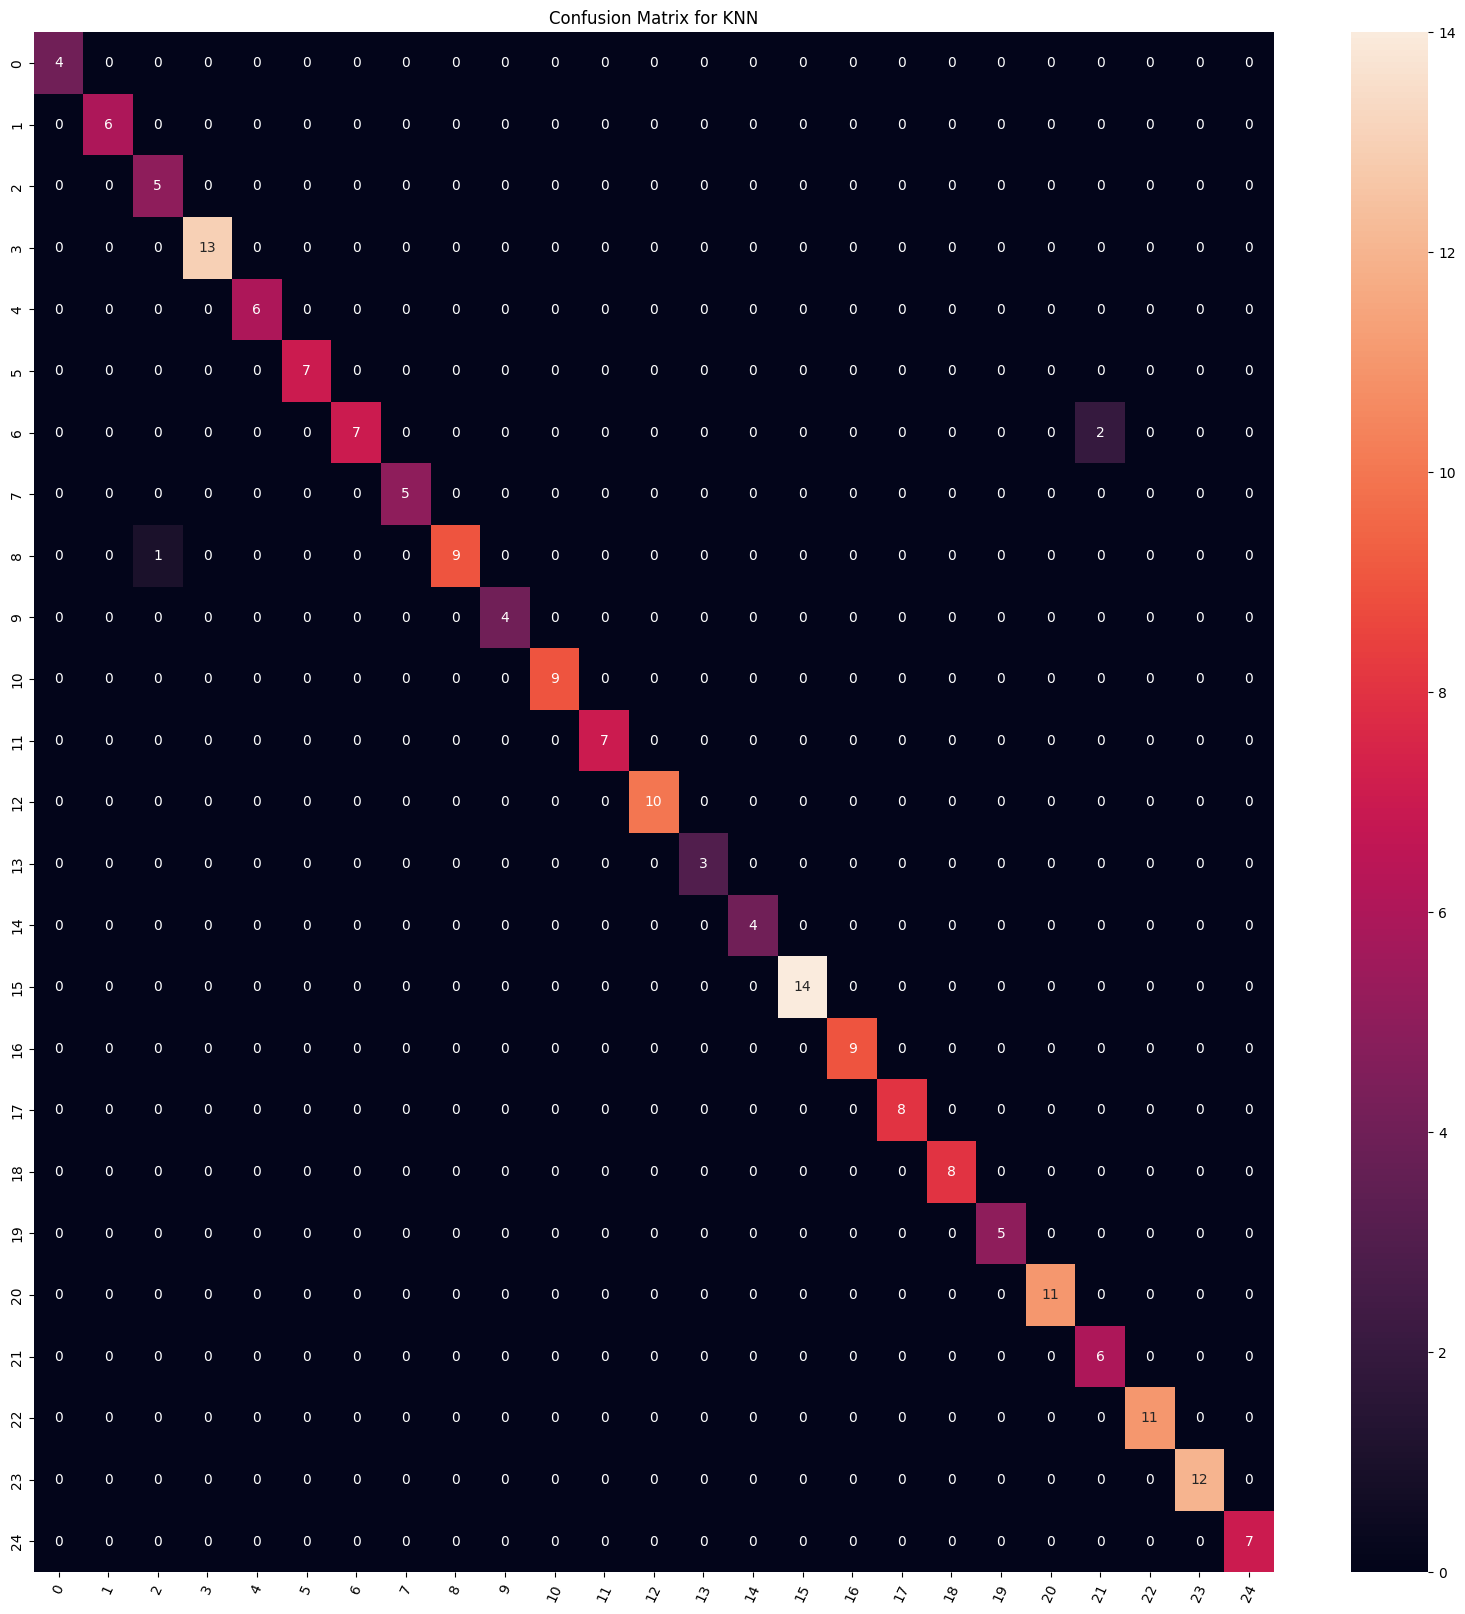

In [133]:
# plot confusion matrix --> for each model
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
plt.xticks(rotation=65)
plt.yticks(rotation=65)
plt.title("Confusion Matrix for KNN")
cm = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

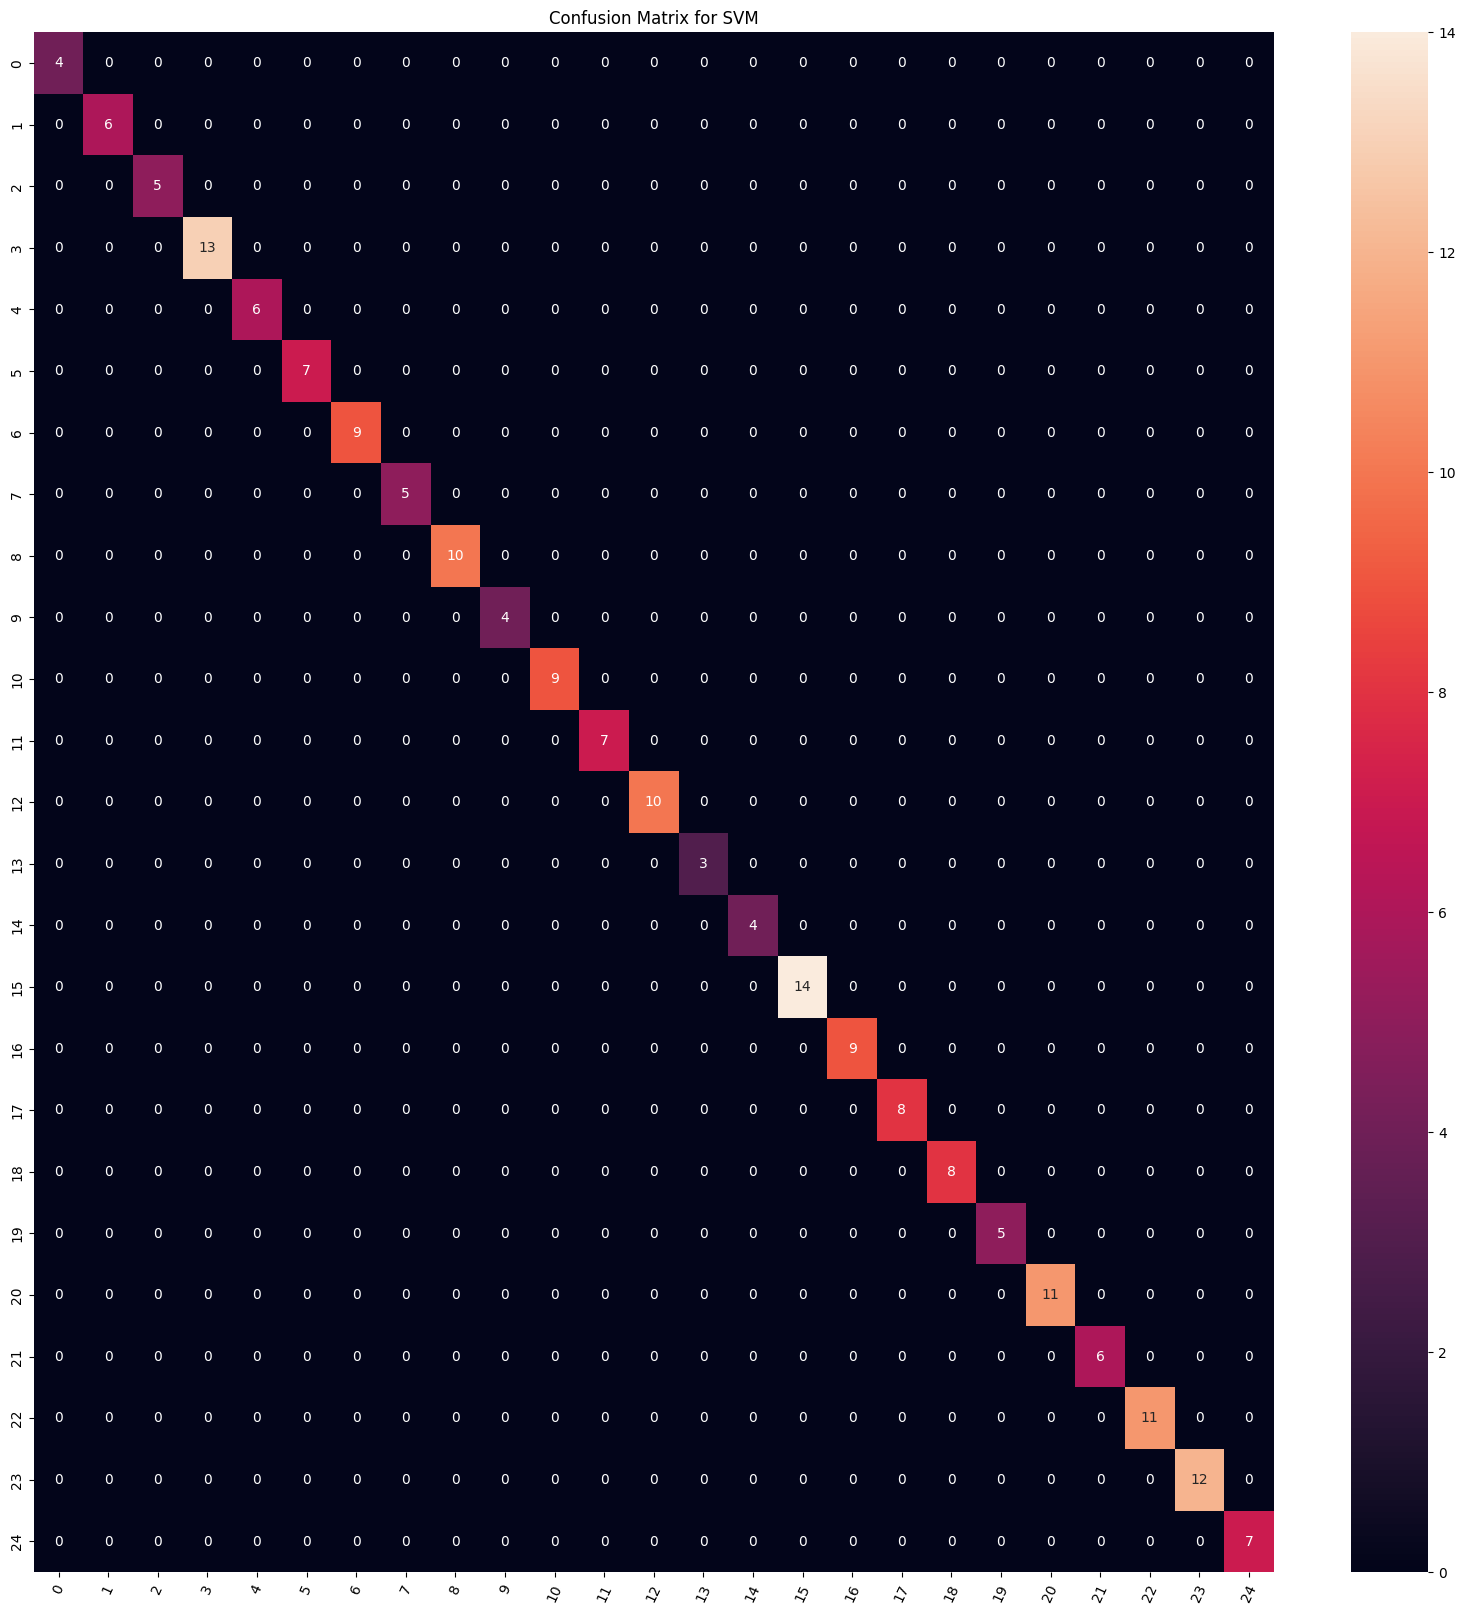

In [134]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
plt.xticks(rotation=65)
plt.yticks(rotation=65)
plt.title("Confusion Matrix for SVM")
cm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

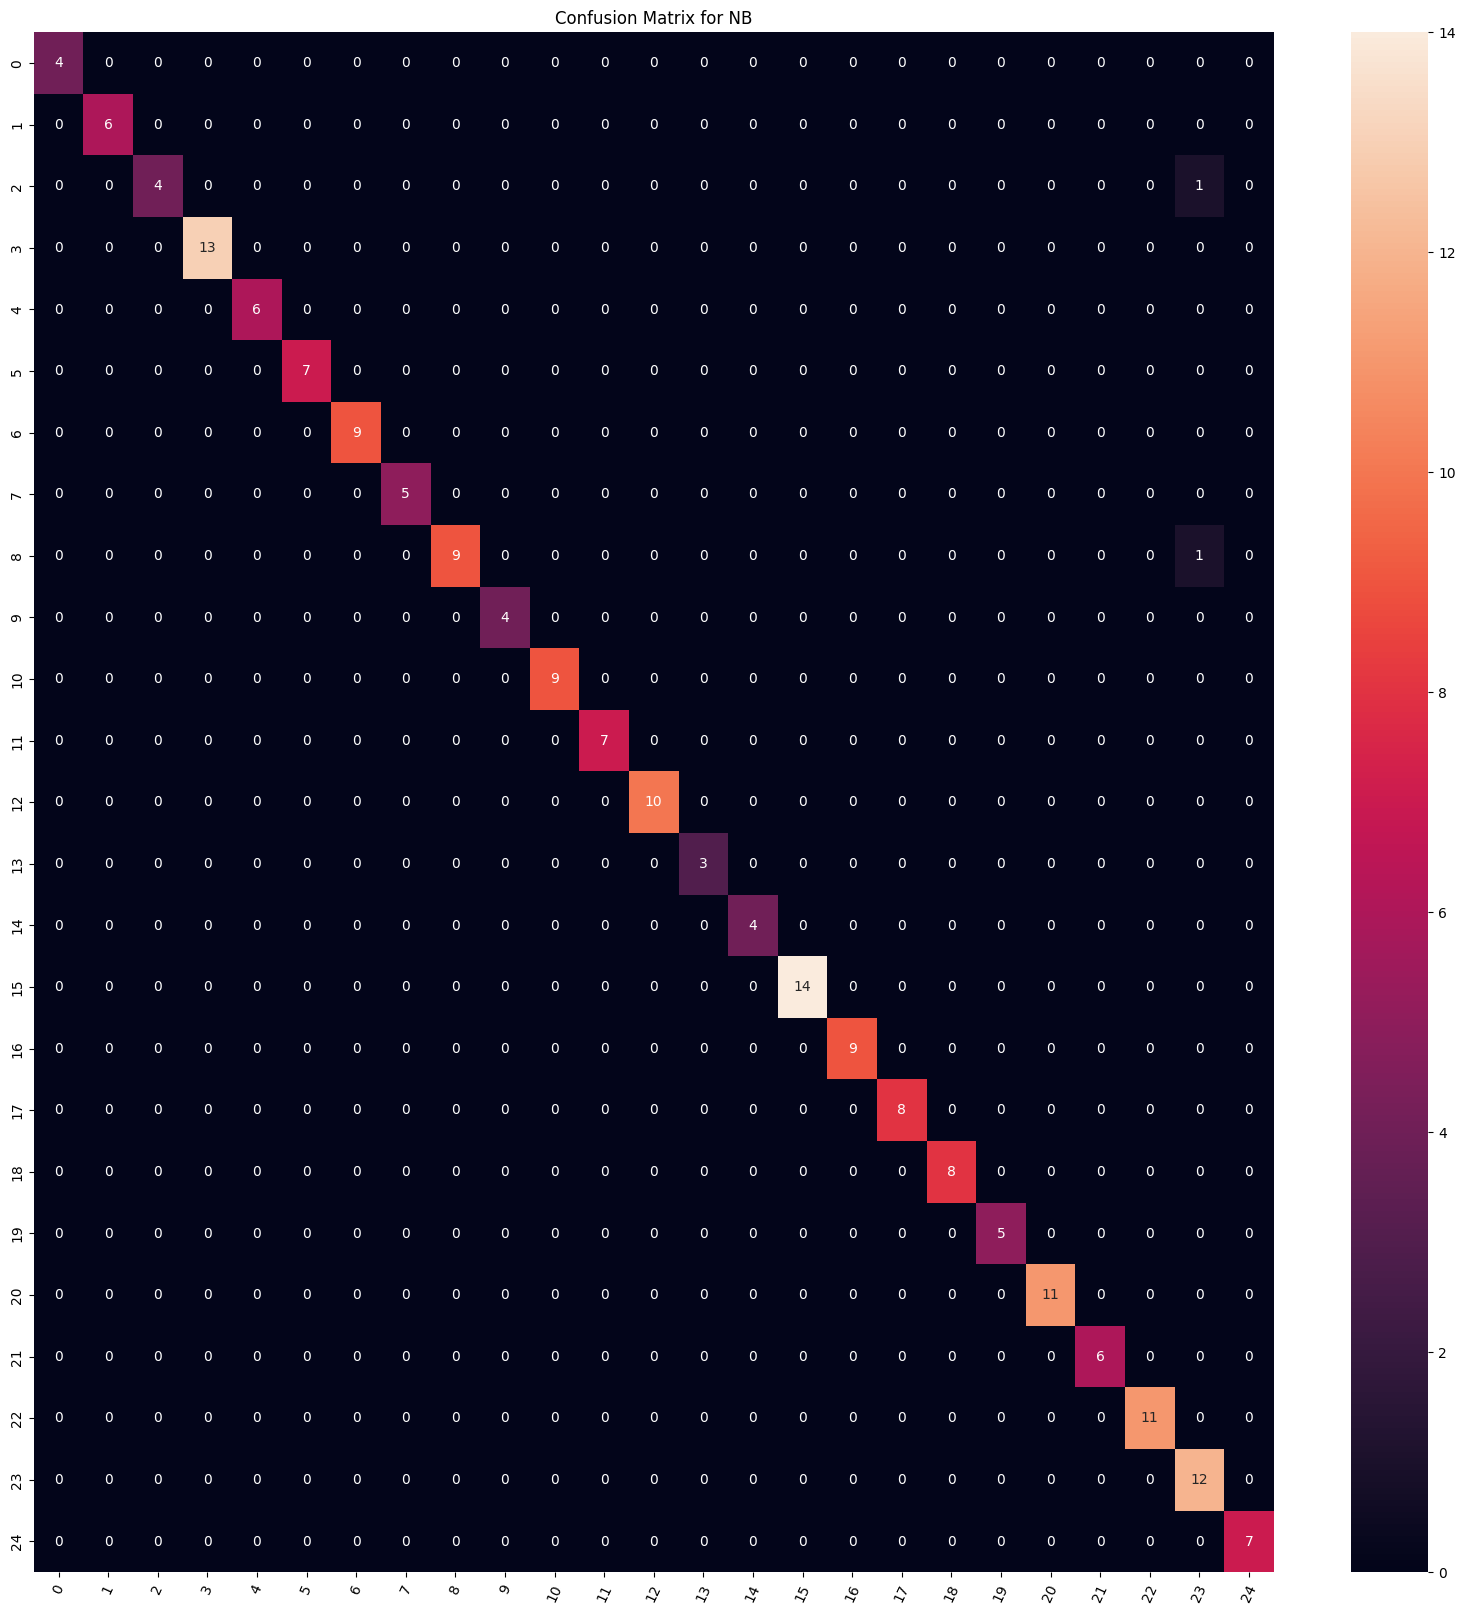

In [135]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
plt.xticks(rotation=65)
plt.yticks(rotation=65)
plt.title("Confusion Matrix for NB")
cm = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

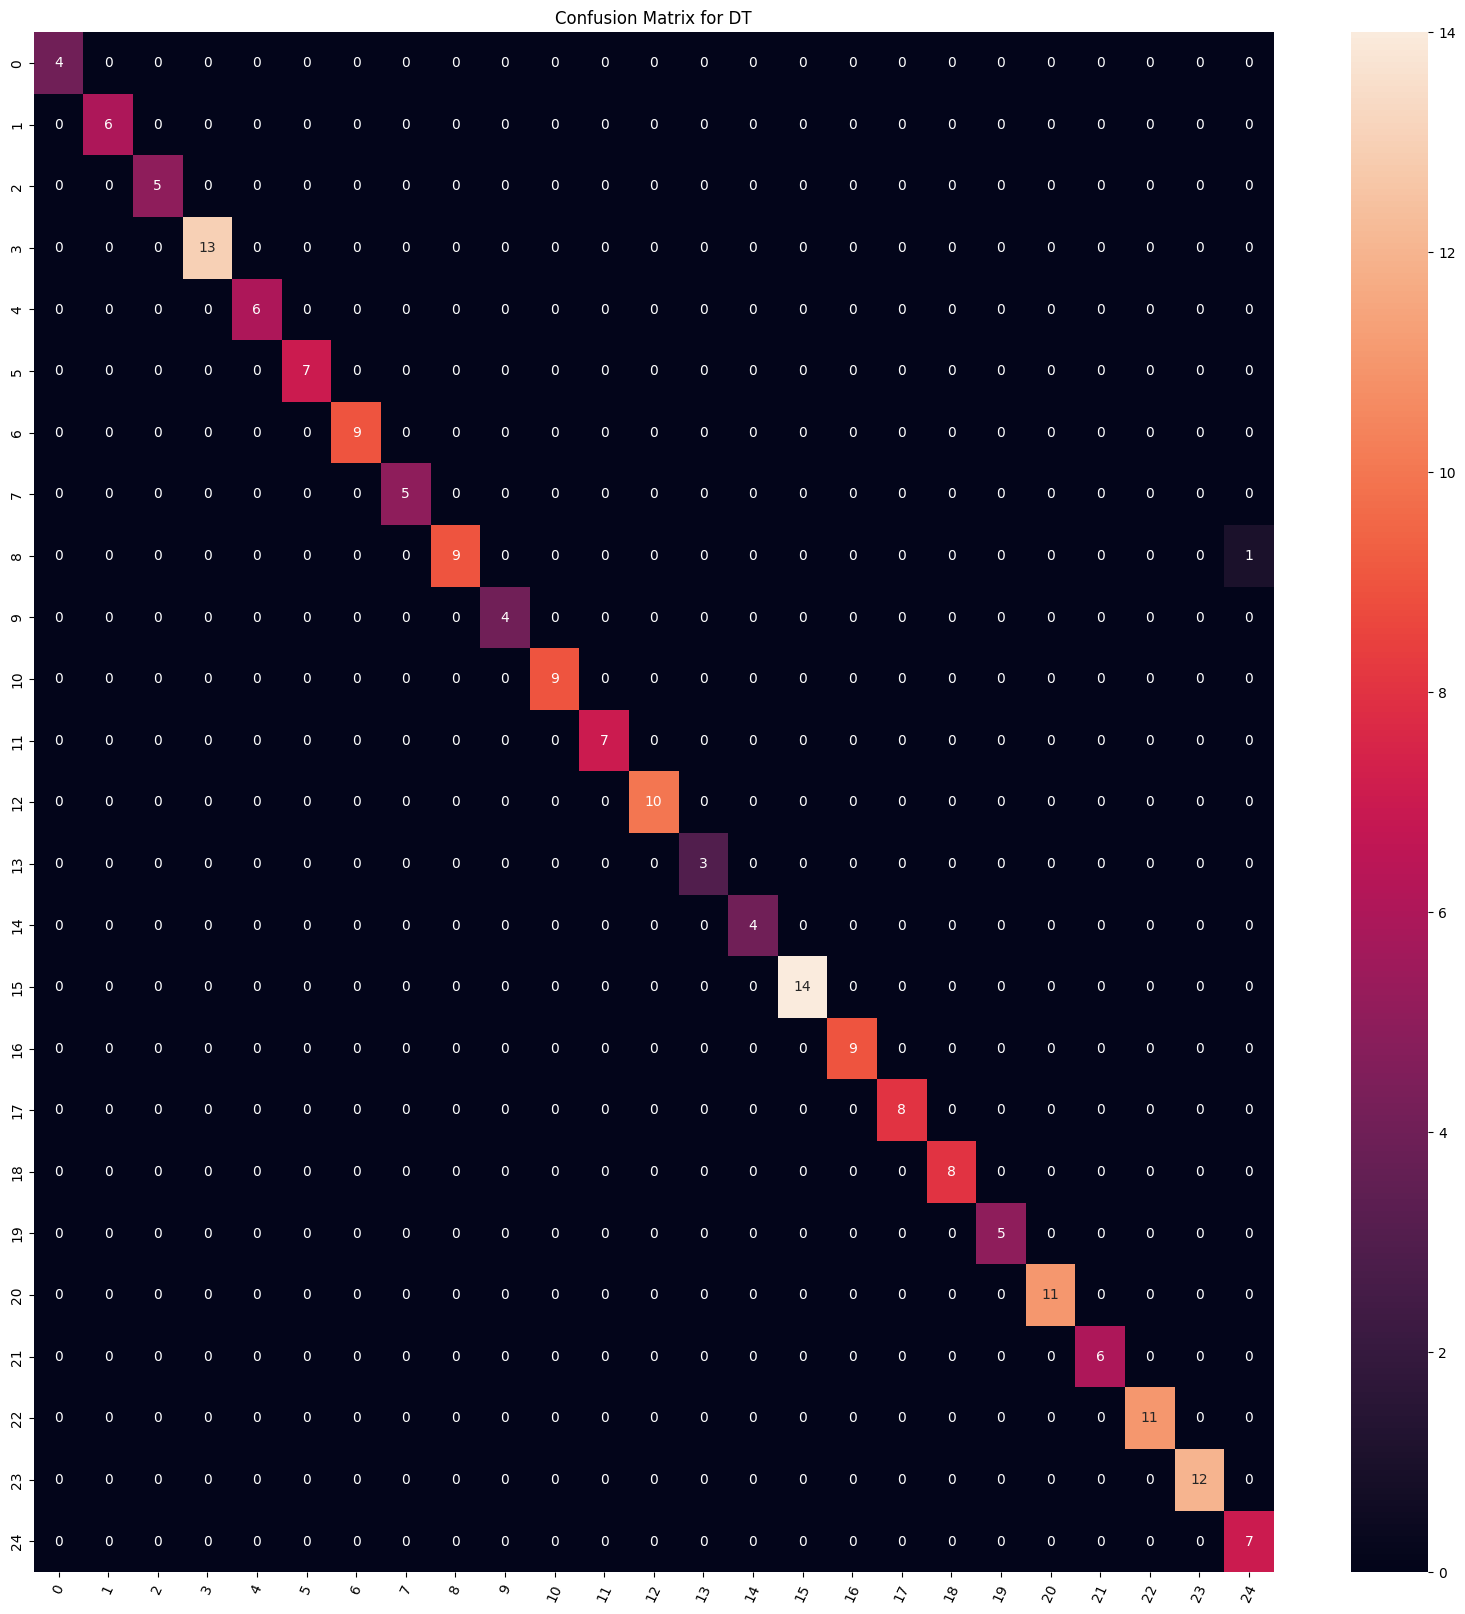

In [136]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
plt.xticks(rotation=65)
plt.yticks(rotation=65)
plt.title("Confusion Matrix for DT")
cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

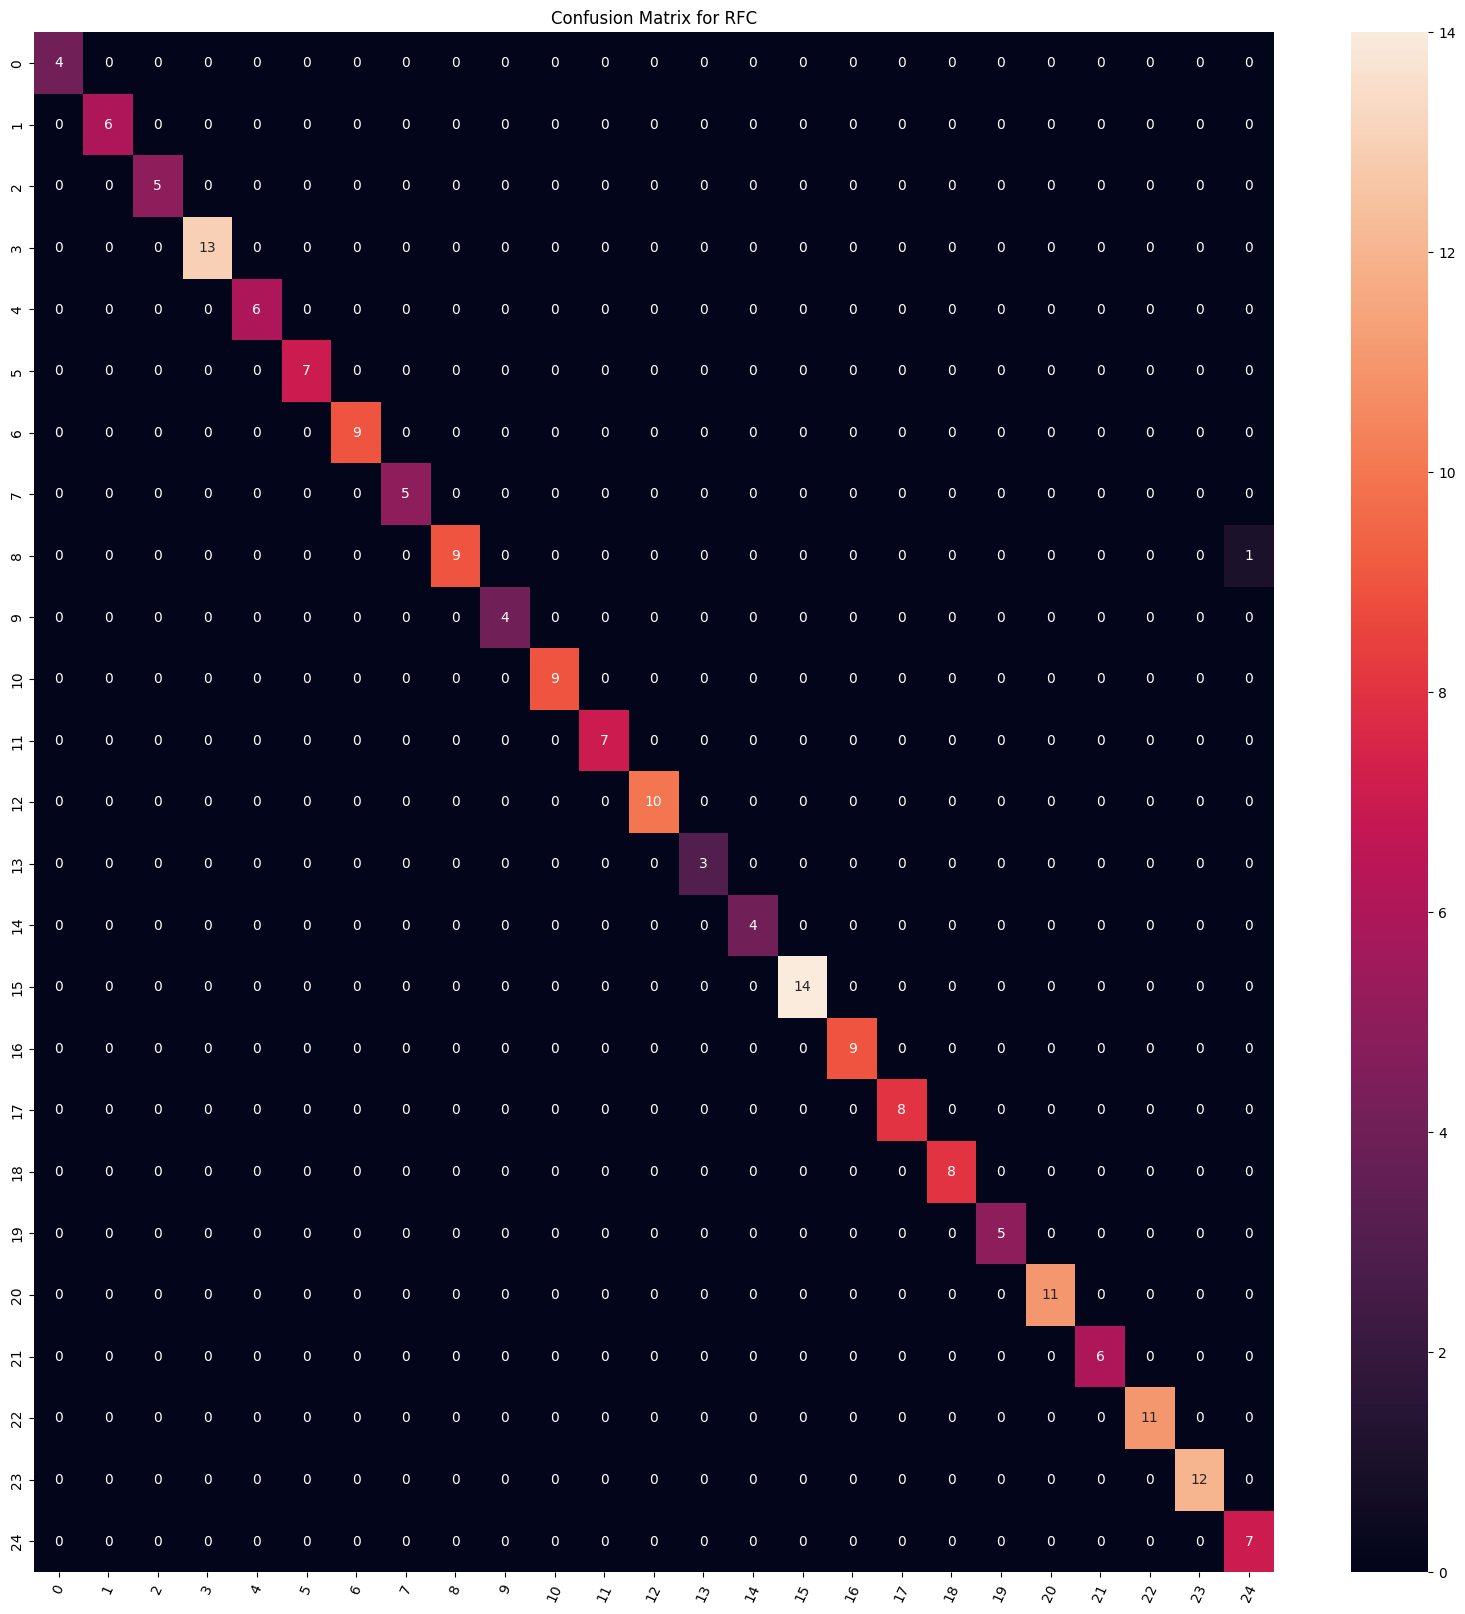

In [137]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
plt.xticks(rotation=65)
plt.yticks(rotation=65)
plt.title("Confusion Matrix for RFC")
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

EXPORT MODEL

In [142]:
# Save files -->
import pickle
pickle.dump(tf,open('tf.pkl','wb'))
pickle.dump(svm,open('clf.pkl','wb'))

TEST OUR MODEL ON SOME PREDICTION SYSTEM

In [140]:
myresume = """skills  programming languages  python  pandas  numpy  scipy  scikit learn  matplotlib   sql  java  javascript jquery    machine learning  regression  svm  naã ve bayes  knn  random forest  decision trees  boosting techniques  cluster analysis  word embedding  sentiment analysis  natural language processing  dimensionality reduction  topic modelling  lda  nmf   pca   neural nets    database visualizations  mysql  sqlserver  cassandra  hbase  elasticsearch  js  dc js  plotly  kibana  matplotlib  ggplot  tableau    others  regular expression  html  css  angular   logstash  kafka  python flask  git  docker  computer vision   open cv and understanding of deep learning education details     data science assurance associate     data science assurance associate   ernst   young llp  skill details   javascript  exprience    months  jquery  exprience    months  python  exprience    monthscompany details   company   ernst   young llp  description   fraud investigations and dispute services   assurance  technology assisted review  tar  technology assisted review  assists in accelerating the review process and run analytics and generate reports     core member of a team helped in developing automated review platform tool from scratch for assisting e discovery domain  this tool implements predictive coding and topic modelling by automating reviews  resulting in reduced labor costs and time spent during the lawyers review     understand the end to end flow of the solution  doing research and development for classification models  predictive analysis and mining of the information present in text data  worked on analyzing the outputs and precision monitoring for the entire tool     tar assists in predictive coding  topic modelling from the evidence by following ey standards  developed the classifier models in order to identify  red flags  and fraud related issues     tools   technologies  python  scikit learn  tfidf      cosine similarity  naã ve bayes  lda  nmf for topic modelling  vader and text blob for sentiment analysis  matplot lib  tableau dashboard for reporting     multiple data science and analytic projects  usa clients   text analytics   motor vehicle customer review data   received customer feedback survey data for past one year  performed sentiment  positive  negative   neutral  and time series analysis on customer comments across all  categories     created heat map of terms by survey category based on frequency of words   extracted positive and negative words across all the survey categories and plotted word cloud     created customized tableau dashboards for effective reporting and visualizations   chatbot   developed a user friendly chatbot for one of our products which handle simple questions about hours of operation  reservation options and so on     this chat bot serves entire product related questions  giving overview of tool via qa platform and also give recommendation responses so that user question to build chain of relevant answer     this too has intelligence to build the pipeline of questions as per user requirement and asks the relevant  recommended questions     tools   technologies  python  natural language processing  nltk  spacy  topic modelling  sentiment analysis  word embedding  scikit learn  javascript jquery  sqlserver    information governance  organizations to make informed decisions about all of the information they store  the integrated information governance portfolio synthesizes intelligence across unstructured data sources and facilitates action to ensure organizations are best positioned to counter information risk     scan data from multiple sources of formats and parse different file formats  extract meta data information  push results for indexing elastic search and created customized  interactive dashboards using kibana     preforming rot analysis on the data which give information of data which helps identify content that is either redundant  outdated  or trivial     preforming full text search analysis on elastic search with predefined methods which can tag as  pii  personally identifiable information  social security numbers  addresses  names  etc   which frequently targeted during cyber attacks   tools   technologies  python  flask  elastic search  kibana    fraud analytic platform  fraud analytics and investigative platform to review all red flag cases   â   fap is a fraud analytics and investigative platform with inbuilt case manager and suite of analytics for various erp systems     it can be used by clients to interrogate their accounting systems for identifying the anomalies which can be indicators of fraud by running advanced analytics  tools   technologies  html  javascript  sqlserver  jquery  css  bootstrap  node js   js  dc js'"""

In [145]:
# Function to predict the category of a resume ---->
import pickle
# load the trained classifier --->
svm = pickle.load(open('clf.pkl','rb'))

# clean the input resume ---> Preprocess the input text (e.g., cleaning, etc.)
cleaned_resume = cleanresume(myresume)

# transform the cleaned resume using the trained tfidf vectorizer --->Vectorize the cleaned text using the same TF-IDF vectorizer used during training
input_features = tf.transform([cleaned_resume])

# make predictions on the loaded classifier --->
prediction_id = svm.predict(input_features)[0]

# map category_id to category_name --->
category_mapping = {
     6:'Data Science',
    12: 'HR',
    0:'Advocate',
    1:'Arts',
    24:'Web Designing',
    16:'Mechanical Engineer',
    22:'Sales',
    14:'Health and fitness',
    5:'Civil Engineer',
    15:'Java Developer',
    4:'Business Analyst',
    21:'SAP Developer',
    2:'Automation Testing',
    11:'Electrical Engineering',
    18:'Operations Manager',
    20:'Python Developer',
    8:'DevOps Engineer',
    17:'Network Security Engineer',
    19:'PMO',
    7:'Database',
    13:'Hadoop',
    10:'ETL Developer',
    9:'DotNet Developer',
    3:'Blockchain',
    23:'Testing',
}

# get name of predicted category --->
category_name = category_mapping.get(prediction_id,'Unknown')
# print the predicted category ---> Return the category name
print("Predicted Category:", category_name)
print(prediction_id)

Predicted Category: Data Science
6
